## Real Estate Market Analysis Project
Welcome to the first project of the Acamica Data Science career!

The objective of this project is to reproduce the steps that a Data Scientist would take when facing a real problem. Therefore, it consists of three sections:

In Part 1, we present the problem you will work on. In this section, you will need to decide which data will help you address this problem and where you can obtain it.
In Part 2, we provide you with a dataset to address the proposed problem. You will need to perform Exploratory Data Analysis on this dataset.
In Part 3, you will need to use Machine Learning tools to predict the variable of interest.
In this project, you will work with a dataset of properties for sale published on the Properati portal.

Important: Remember that a notebook is a report, so you must explain what you are doing as you solve the prompts. It is important that whoever reads it understands the workflow, what you intended to do. Remember, simple and concise is a winning combination.

Problem
You have recently joined the Data team of a large real estate agency. The first task assigned to you is to help the appraisers value properties, as it is a difficult and sometimes subjective process. To do this, you propose creating a Machine Learning model that, given certain property characteristics, predicts its sale price.

1. Thinking like a Data Scientist
Answer the following question:

What data do you think would help you work on the problem? Why?
Important: You should NOT search for this data; just justify what information you think would help you solve the proposed problem.

- The dataset will surely have information on the details of the space that the property may contain, its location, an official price value, as well as the most positive features of the place, such as its good location and the number of rooms.

- Quantifiable values are those that will provide the most information, and they will also be the ones that allow the creation of predictive models.

## 2. Exploratory Data Analysis
In this section, you must perform an Exploratory Data Analysis on the Properati properties dataset. It is important to answer the following questions during the analysis:

What is the size of the dataset? How many instances and how many columns?
How many missing values are there in each column?
What is the distribution of each variable? You should create histograms for numerical variables and bar charts for categorical variables.
How do the variables relate to each other? What type of graph will be convenient to present this information?
How are the numerical variables correlated? What type of graph will be convenient to present this information? What will be the best predictors of the variable of interest?
You will find instructions to answer these questions. It is important to clarify that these instructions correspond to the minimum deliverable that we expect in the assignment.

# Comments on the dataset

We have already done some data cleaning on the dataset, which you can download directly from the Properati page. Many of the steps we took to clean the dataset will be covered during Block 2 of the career.

If you have doubts about what any of the columns represent, you can check here. You will notice that some columns were discarded.

Capital Federal refers to the City of Buenos Aires. Bs.As. G.B.A. Zona Norte, Bs.As. G.B.A. Zona Sur, and Bs.As. G.B.A. Zona Oeste are regions that make up the Greater Buenos Aires, a set of cities that surround the City of Buenos Aires.



0. Import the necessary libraries to work on the task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset using Pandas functionalities. Print how many rows and columns it has, and display its first five instances.

In [2]:
# Code to read csv file into Colaboratory:
'''from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user();
gauth = GoogleAuth();
gauth.credentials = GoogleCredentials.get_application_default();
drive = GoogleDrive(gauth);

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# How do I import the file now?
downloaded = drive.CreateFile({'id': '1nlY5GkH0cbkWAXUvERBtr0vRCk4YlBJP'});
downloaded.GetContentFile('DS_Proyecto_01_Datos_Properati.csv');'''
datos = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv');


- Se aplica un protocolo básico de comunicación entre Google Drive y el Notebook, no olvidar reemplazar el ` id` que se puede ver en el propio enlace al compatir el archivo. Ademas se analiza las situaciones en donde la covered surface supera la total. Se remplaza el valor del valor cubierto por el total.

In [4]:
datos['price_per_meter'] = datos['price'] / datos['surface_total'];
datos.loc[datos.surface_covered > datos.surface_total, "surface_covered"] = datos.loc[datos.surface_covered > datos.surface_total, "surface_total"]
print("Dimensions del dataset - filas, columnas:", datos.shape)
datos.head()

Dimensions del dataset - filas, columnas: (146660, 20)


start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  price_per_meter  
0          Venta      1092.857143  
1          Venta      2271.428571  
2          Venta      2777.777778  
3          Venta      3470.588235  
4          Venta       800.000000

- Se realizó la carga del dataset mediante protoloco de autenticación desde Google Drive y se extrajo el `Head()` del archivo en cuestión y sus dimensiones se extraen con el comando ` Shape`, se puede observar que cuenta con 20 columnas, cada una con información inmobiliaria relevante, que tal vez para este tipo de modelo, localizaciones pueden servir para hacer más objetiva la muestra que se tomará y seguido a esto las variables cuantificables se deberán filtrar.

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
print("Cantidad de valores faltantes en cada columna:\n", datos.isna().sum());

Cantidad de valores faltantes en cada columna:
 start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
price_per_meter    20527
dtype: int64


- Se puede observar que hay una gran cantidad de datos faltantes en las variables de `surface_total` y `surface_covered`, estas dos variables se pondrán como principal objetivo para filtrado, además `bathrooms` también podría significar un problema si no se filtra.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Tipos de propiedad y cantidad de instancias por cada una:
  Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


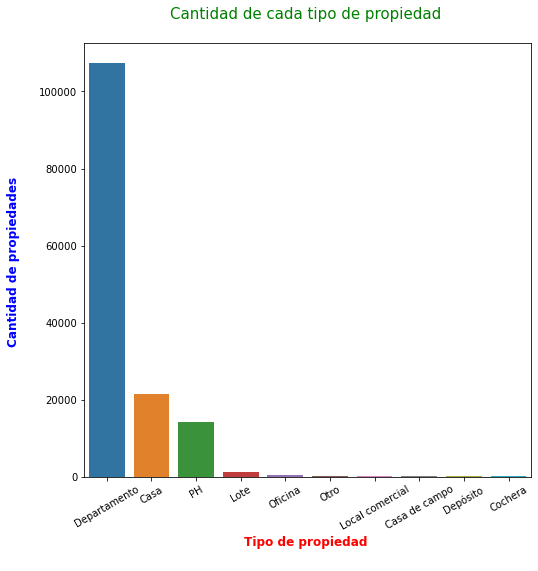

In [6]:
print("Tipos de propiedad y cantidad de instancias por cada una:\n ", datos.property_type.value_counts())
plt.figure(figsize = (8,8));
sns.countplot(x = "property_type", data = datos, order = datos.property_type.value_counts().index);

plt.xticks(rotation = 30);
plt.xlabel("Tipo de propiedad \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Cantidad de cada tipo de propiedad \n", fontsize=15, color="green");

- Hay 10 categorías en el dataset, los más relevantes son 'Departamento', 'Casa' y 'PH' los cuales superar or bastantes proporciones el resto de categorías.Y acerca de la cantidad, en la Figura anterior se ilustran lo mencionado.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

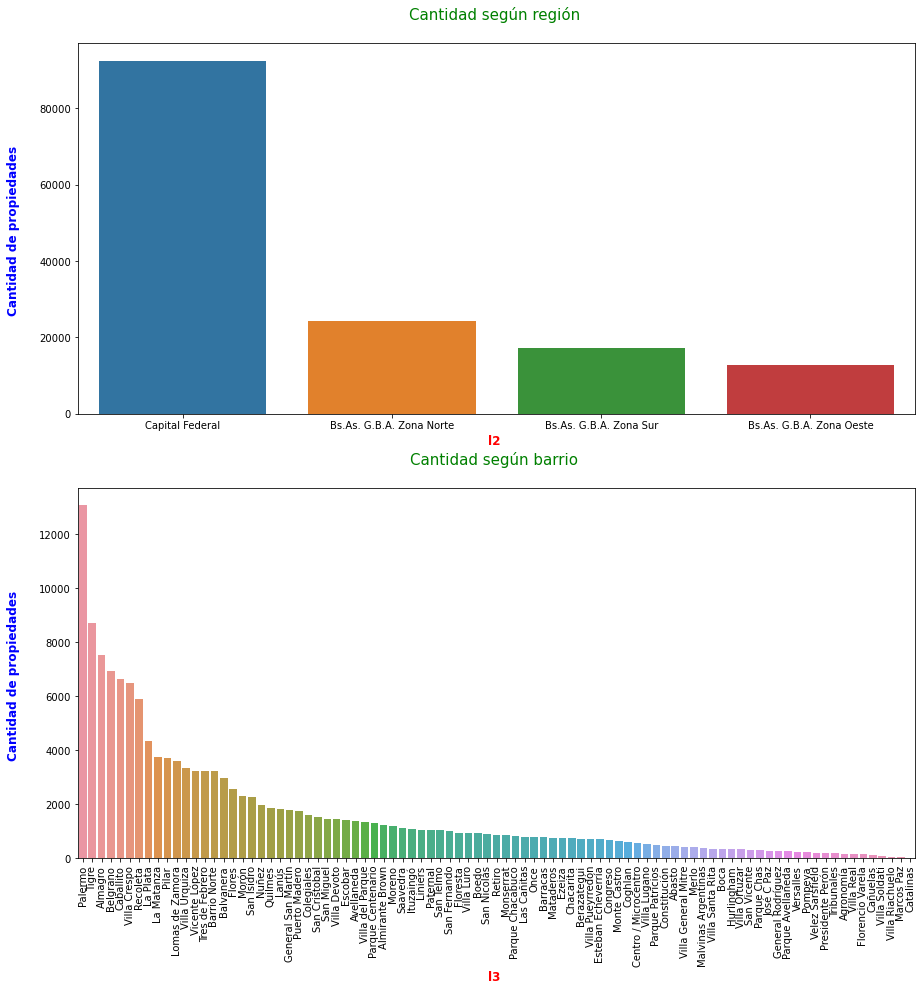

In [7]:
plt.figure(figsize = (15,15))

plt.subplot(2,1,1);
sns.countplot(x = "l2", data = datos, order = datos.l2.value_counts().index);
plt.xlabel("l2 \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Cantidad según región \n", fontsize=15, color="green");

plt.subplot(2,1,2);
sns.countplot(x = "l3", data = datos, order = datos.l3.value_counts().index);
plt.xlabel("l3 \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Cantidad según barrio \n", fontsize=15, color="green");
plt.xticks(rotation = 90);


- Ahora se busca saber cuales son las principales regiones en donde se publican y los barrios en ellas.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Text(0.5, 1.0, 'Tipo de inmueble \n')

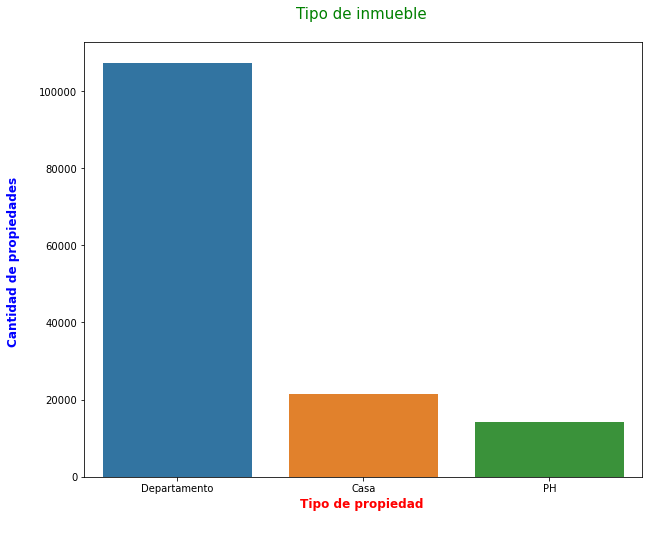

In [8]:
#Buscamos ahora las 3 clases más abundantes
mask_principales = datos.property_type.isin(["Departamento", "Casa", "PH"])
prop_principales = datos[mask_principales]

plt.figure(figsize = (10,8))
sns.countplot(x = "property_type", data = prop_principales, order = prop_principales.property_type.value_counts().index)
plt.xlabel("Tipo de propiedad \n", fontweight = "black", fontsize = 12, color ="red")
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue")
plt.title("Tipo de inmueble \n", fontsize=15, color="green")

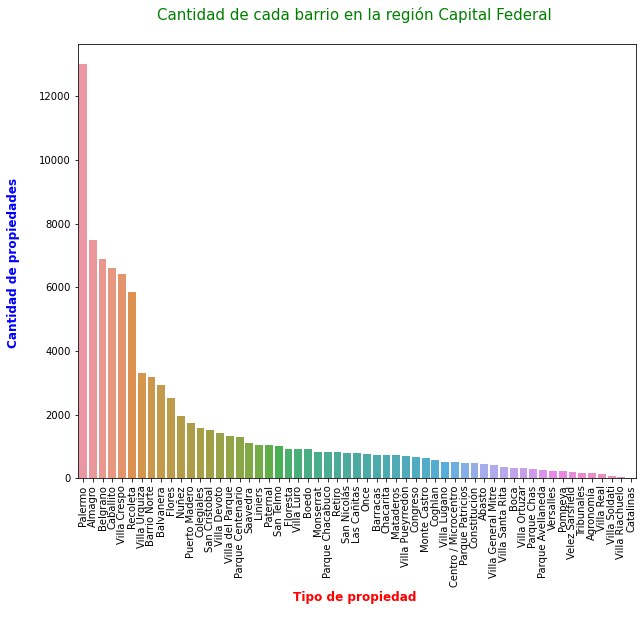

In [9]:
#Ahora seleccionamos la región con mayor cantidad de propidades

mask_regionesInteres = prop_principales.l2.isin(["Capital Federal"]);
prop_regionesInteres = prop_principales[mask_regionesInteres];

plt.figure(figsize = (10,8));
sns.countplot(x = "l3", data = prop_regionesInteres, order = prop_regionesInteres['l3'].value_counts().index);

plt.xlabel("Tipo de propiedad \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Cantidad de cada barrio en la región Capital Federal \n", fontsize=15, color="green");
plt.xticks(rotation = 90);

In [10]:
print(prop_regionesInteres.shape, prop_principales.shape)

(91485, 20) (143145, 20)


- Después de aplicar todos los criterios anteriores, se filtraron según las clase de inmuebles en el arreglo `prop_principales` y luego se volvió a aplicar un filtro

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [11]:
prop_regionesInteres[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     82250.000000  9.148500e+04  
mean         92.246881  2.595003e+05  
std         765.421528  3.222654e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.200000e+05  
50%          63.000000  1.750000e+05  
75%          96.000000  2.790000e+05  
max      126062.000000  3.243423e+07

- A primera vista, podría pensar que por la dispensión de sus datos, tanto `surface_total` y `surface_covered` son datos que no podrían dan una idea clara a un modelo para poder determinar de forma organizada una tendencia. Esto también podría mencionarse de `price` pero es una variable que se relaciona con estos mismos datos mencionados.**



2. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable

In [12]:
print("Pequeño resumen descriptivos y valores faltantes \n")

print(prop_regionesInteres['surface_total'].describe() ,"\n");

print("Cantidad de valores faltantes en surface_total:\n", prop_regionesInteres['surface_total'].isna().sum());

Pequeño resumen descriptivos y valores faltantes 

count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
25%          49.000000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64 

Cantidad de valores faltantes en surface_total:
 8917


In [13]:
print(prop_regionesInteres[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","price_per_meter"]].isna().sum(), prop_regionesInteres.shape,'\n')
#Ahora, la consideración del caso de estudio, donde surface_total no puede ser menor que surface_covered
F1 = prop_regionesInteres[(prop_regionesInteres.surface_total >= prop_regionesInteres.surface_covered)];
print(F1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","price_per_meter"]].isna().sum(), F1.shape, '\n')
#observamos que aún hay propiedades en donde el dato de 'bathroom' está vacío, se procede a la eliminación de estos datos igualmente
F1 = F1.dropna(subset = ["bathrooms"])
print(F1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","price_per_meter"]].isna().sum(), F1.shape,'\n')


rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
price_per_meter    8917
dtype: int64 (91485, 20) 

rooms                0
bedrooms             0
bathrooms          841
surface_total        0
surface_covered      0
price                0
price_per_meter      0
dtype: int64 (82051, 20) 

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
price_per_meter    0
dtype: int64 (81210, 20) 



Text(0.5, 0, 'Boxplot:Precios por metro USD')

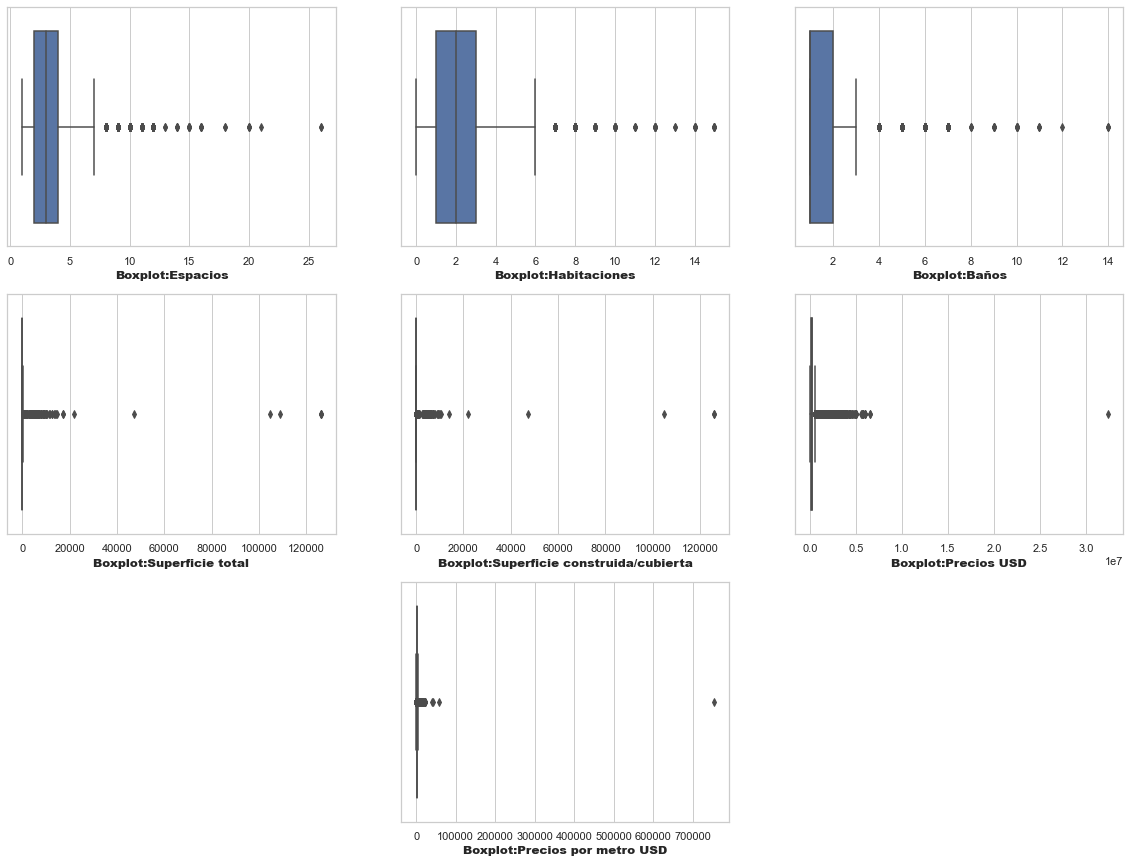

In [14]:
#Visualizamos boxplot de esta misma variable.
plt.figure(figsize = (20,15));
sns.set_theme(style="whitegrid")

plt.subplot(3,3,1);
sns.boxplot(x=F1.rooms);
plt.xlabel("Boxplot:Espacios", fontweight = "black", fontsize = 12)

plt.subplot(3,3,2);
sns.boxplot(x=F1.bedrooms);
plt.xlabel("Boxplot:Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(3,3,3);
sns.boxplot(x=F1.bathrooms);
plt.xlabel("Boxplot:Baños", fontweight = "black", fontsize = 12)

plt.subplot(3,3,4);
sns.boxplot(x=F1.surface_total);
plt.xlabel("Boxplot:Superficie total", fontweight = "black", fontsize = 12)

plt.subplot(3,3,5);
sns.boxplot(x=F1.surface_covered);
plt.xlabel("Boxplot:Superficie construida/cubierta", fontweight = "black", fontsize = 12)

plt.subplot(3,3,6);
sns.boxplot(x=F1.price);
plt.xlabel("Boxplot:Precios USD", fontweight = "black", fontsize = 12)

plt.subplot(3,3,8);
sns.boxplot(x=F1.price_per_meter);
plt.xlabel("Boxplot:Precios por metro USD", fontweight = "black", fontsize = 12)


- Los boxplot comparativos de cada una de las variables, demostraron lo que podía observar desde las primeras descripciones de datos, y es que la distribución de `surface_total`, `surface_covered`, `price` tiene cierta cantidad de datos atípicos. Lo recomendado para este tipo de proyectos podría ser un manejo consciente de la impresición que estos datos pueden llegar a tener en un modelo y también proceder a eliminarlos.

In [15]:
MinQ = F1.quantile (0.10)
MaxQ = F1.quantile (0.9)
IQR = MaxQ - MinQ
F2 = F1[~ ((F1 < (MinQ - 1.5 * IQR)) | (F1 > (MaxQ + 1.5 * IQR))).any(axis=1)]
F2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price","price_per_meter"]].describe()

C:\Users\andre\AppData\Local\Temp/ipykernel_42468/1240020572.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  F2 = F1[~ ((F1 < (MinQ - 1.5 * IQR)) | (F1 > (MaxQ + 1.5 * IQR))).any(axis=1)]


rooms      bedrooms     bathrooms  surface_total  \
count  77652.000000  77652.000000  77652.000000   77652.000000   
mean       2.899191      1.921741      1.475326      85.322220   
std        1.129762      0.933973      0.728795      53.879197   
min        1.000000      0.000000      1.000000      13.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      70.000000   
75%        4.000000      3.000000      2.000000     103.000000   
max        7.000000      6.000000      6.000000     390.000000   

       surface_covered         price  price_per_meter  
count     77652.000000  7.765200e+04     77652.000000  
mean         74.050482  2.211718e+05      2686.835273  
std          43.303755  1.519171e+05       923.219448  
min           1.000000  6.000000e+03        17.647059  
25%          44.000000  1.220000e+05      2100.000000  
50%          61.000000  1.749000e+05      2568.571429  
75%          90.000000  2.650000e+05      3125.000000  
max         321.000000  1.040000e+06      7384.615385

Text(0.5, 0, 'Boxplot:Precios por metro USD')

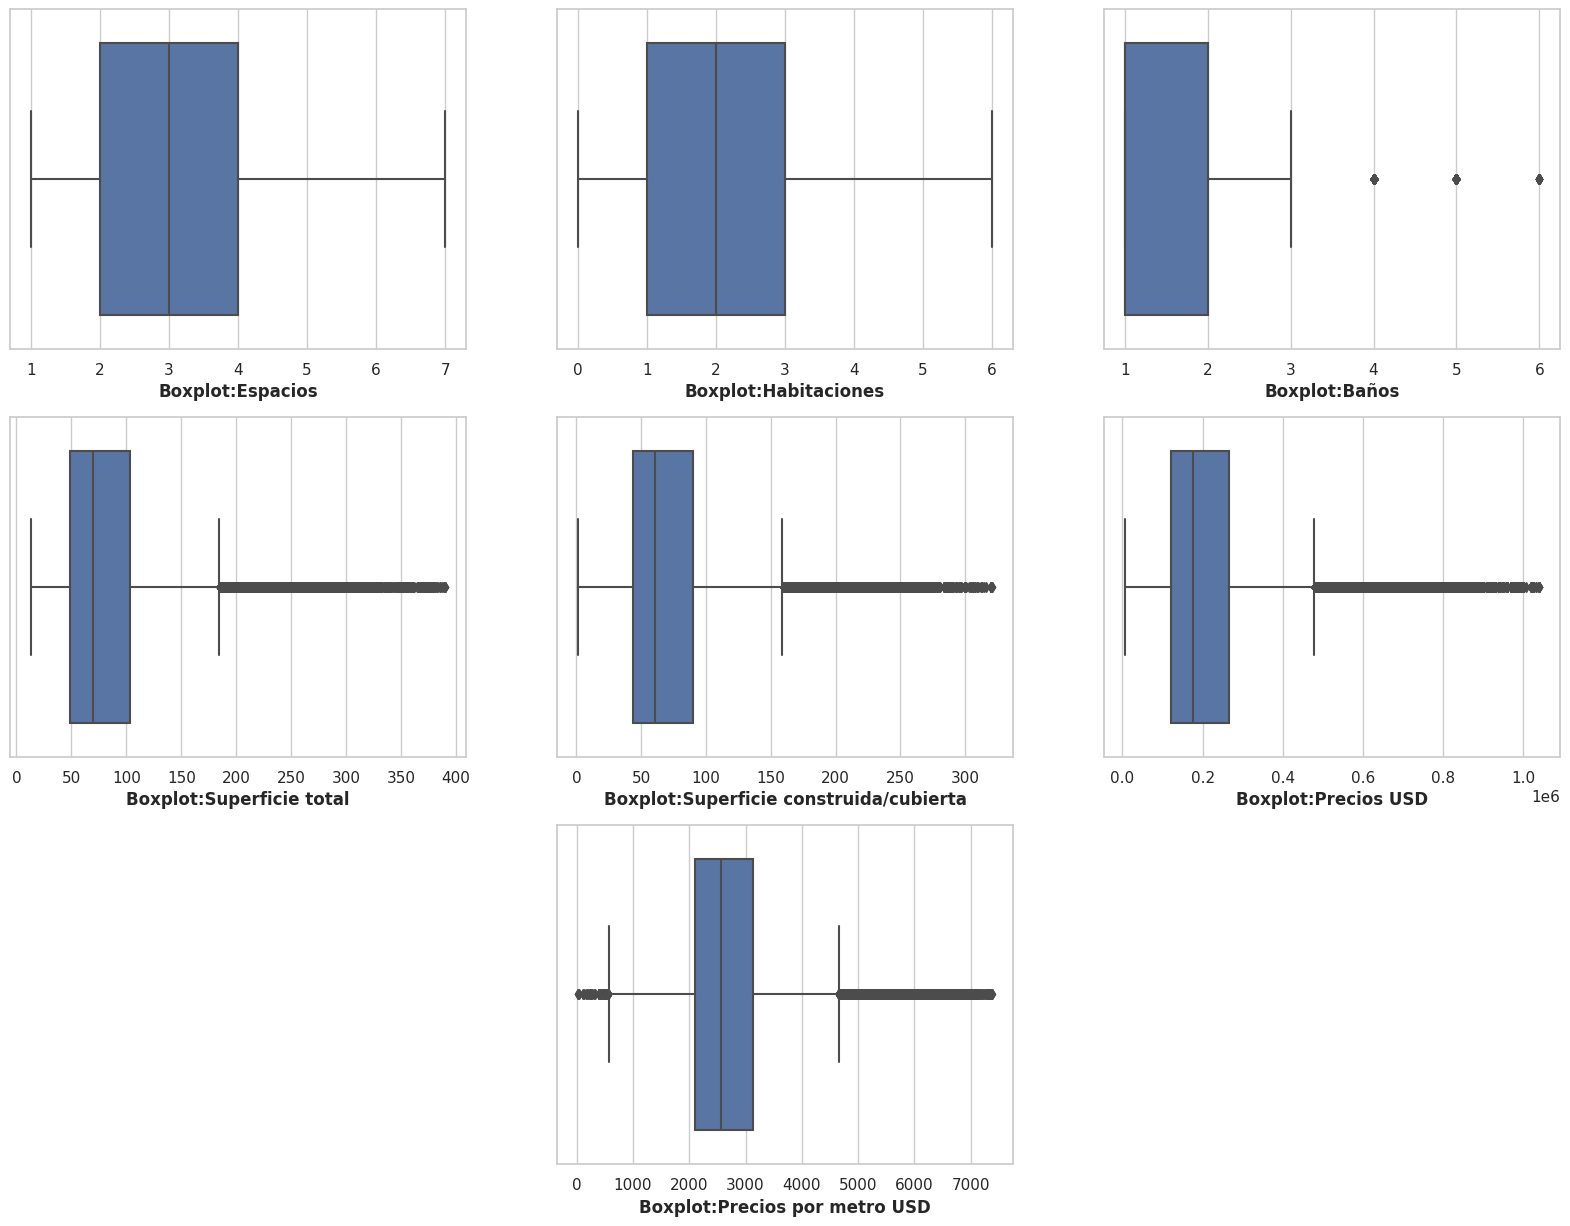

In [39]:
#Visualizamos boxplot de esta misma variable bajo un segundo filtro
plt.figure(figsize = (20,15));
sns.set_theme(style="whitegrid")

plt.subplot(3,3,1);
sns.boxplot(x=F2.rooms);
plt.xlabel("Boxplot:Espacios", fontweight = "black", fontsize = 12)

plt.subplot(3,3,2);
sns.boxplot(x=F2.bedrooms);
plt.xlabel("Boxplot:Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(3,3,3);
sns.boxplot(x=F2.bathrooms);
plt.xlabel("Boxplot:Baños", fontweight = "black", fontsize = 12)

plt.subplot(3,3,4);
sns.boxplot(x=F2.surface_total);
plt.xlabel("Boxplot:Superficie total", fontweight = "black", fontsize = 12)

plt.subplot(3,3,5);
sns.boxplot(x=F2.surface_covered);
plt.xlabel("Boxplot:Superficie construida/cubierta", fontweight = "black", fontsize = 12)

plt.subplot(3,3,6);
sns.boxplot(x=F2.price);
plt.xlabel("Boxplot:Precios USD", fontweight = "black", fontsize = 12)

plt.subplot(3,3,8);
sns.boxplot(x=F2.price_per_meter);
plt.xlabel("Boxplot:Precios por metro USD", fontweight = "black", fontsize = 12)

**Ahora, al limitar la cantidad de datos según su ubicación según su cuantil, excluyendo todo ubicado debajo de cuantil 5 y encima del cuantil 90, donde, en variables como `surface_total`, `surface_covered`, `price` presentan un gran número que salen de una distribución**

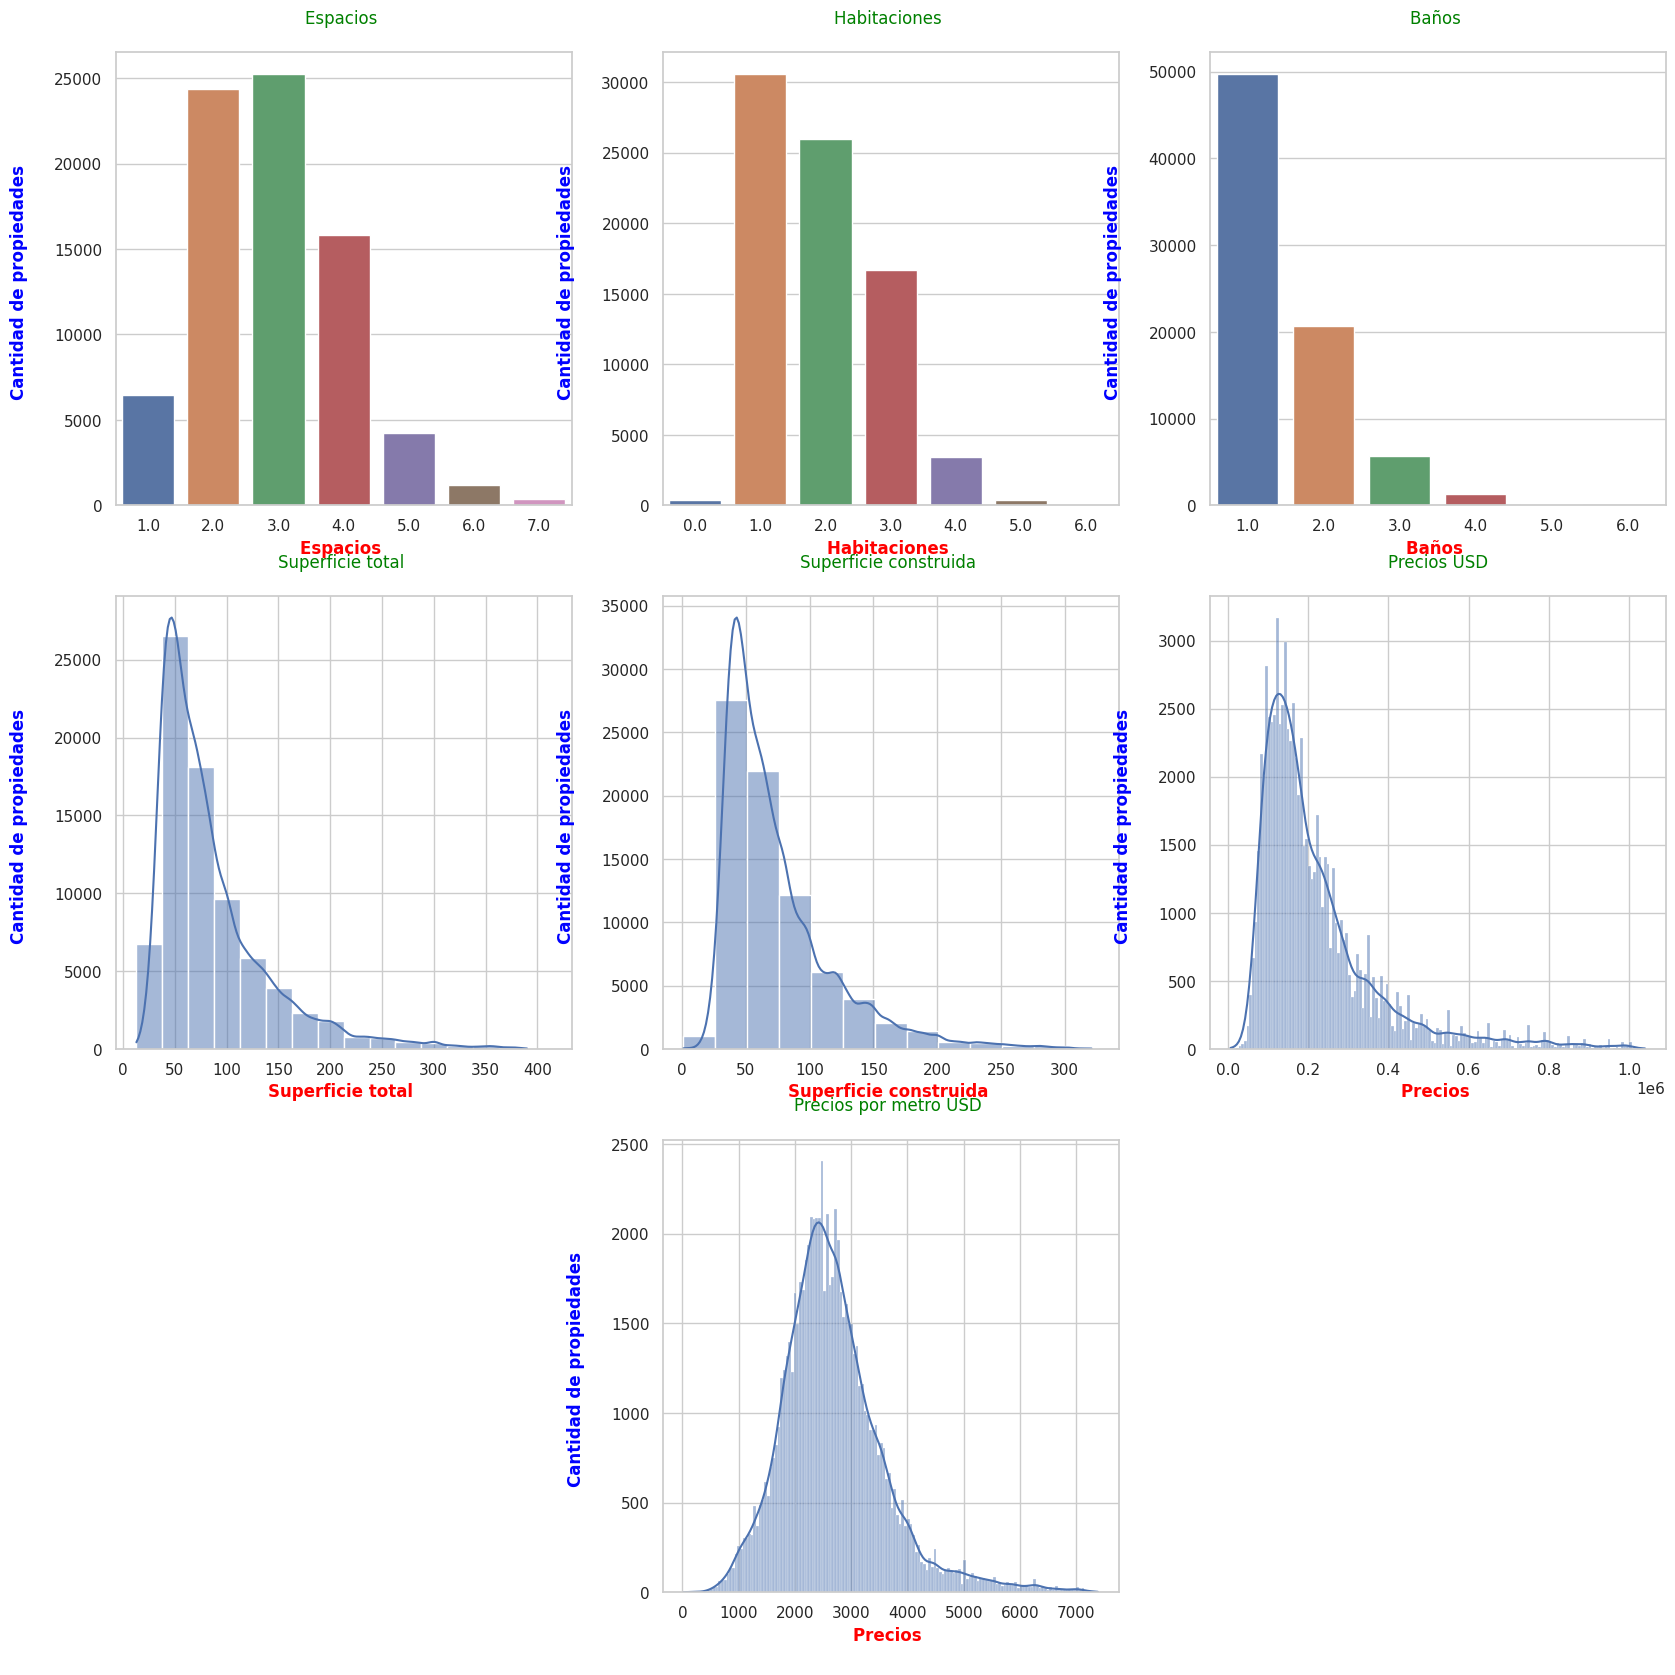

In [40]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1);
sns.countplot(x = "rooms", data = F2);
plt.xlabel("Espacios \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Espacios \n", fontsize=12, color="green");

plt.subplot(3,3,2);
sns.countplot(x = "bedrooms", data = F2);
plt.xlabel("Habitaciones \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Habitaciones \n", fontsize=12, color="green");

plt.subplot(3,3,3);
sns.countplot(x = "bathrooms", data = F2);
plt.xlabel("Baños \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Baños \n", fontsize=12, color="green");

plt.subplot(3,3,4);
sns.histplot(data=F2, x="surface_total",binwidth=25, kde=True);
plt.xlabel("Superficie total \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Superficie total \n", fontsize=12, color="green");

plt.subplot(3,3,5);
sns.histplot(data=F2, x="surface_covered",binwidth=25, kde=True);
plt.xlabel("Superficie construida \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Superficie construida \n", fontsize=12, color="green");

plt.subplot(3,3,6);
sns.histplot(data=F2, x="price",kde=True);
plt.xlabel("Precios \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Precios USD\n", fontsize=12, color="green");

plt.subplot(3,3,8);
sns.histplot(data=F2, x="price_per_meter",kde=True);
plt.xlabel("Precios \n", fontweight = "black", fontsize = 12, color ="red");
plt.ylabel("Cantidad de propiedades \n", fontweight = "black", fontsize = 12, color="blue");
plt.title("Precios por metro USD \n", fontsize=12, color="green");



Una vez se ha hecho un correcto manejo de variables de interés, filtrado y luego selección de cuantiles en donde se encuentre la mayor cantidad de información relevante. Se obtienen las 7 gráficas anteriores.

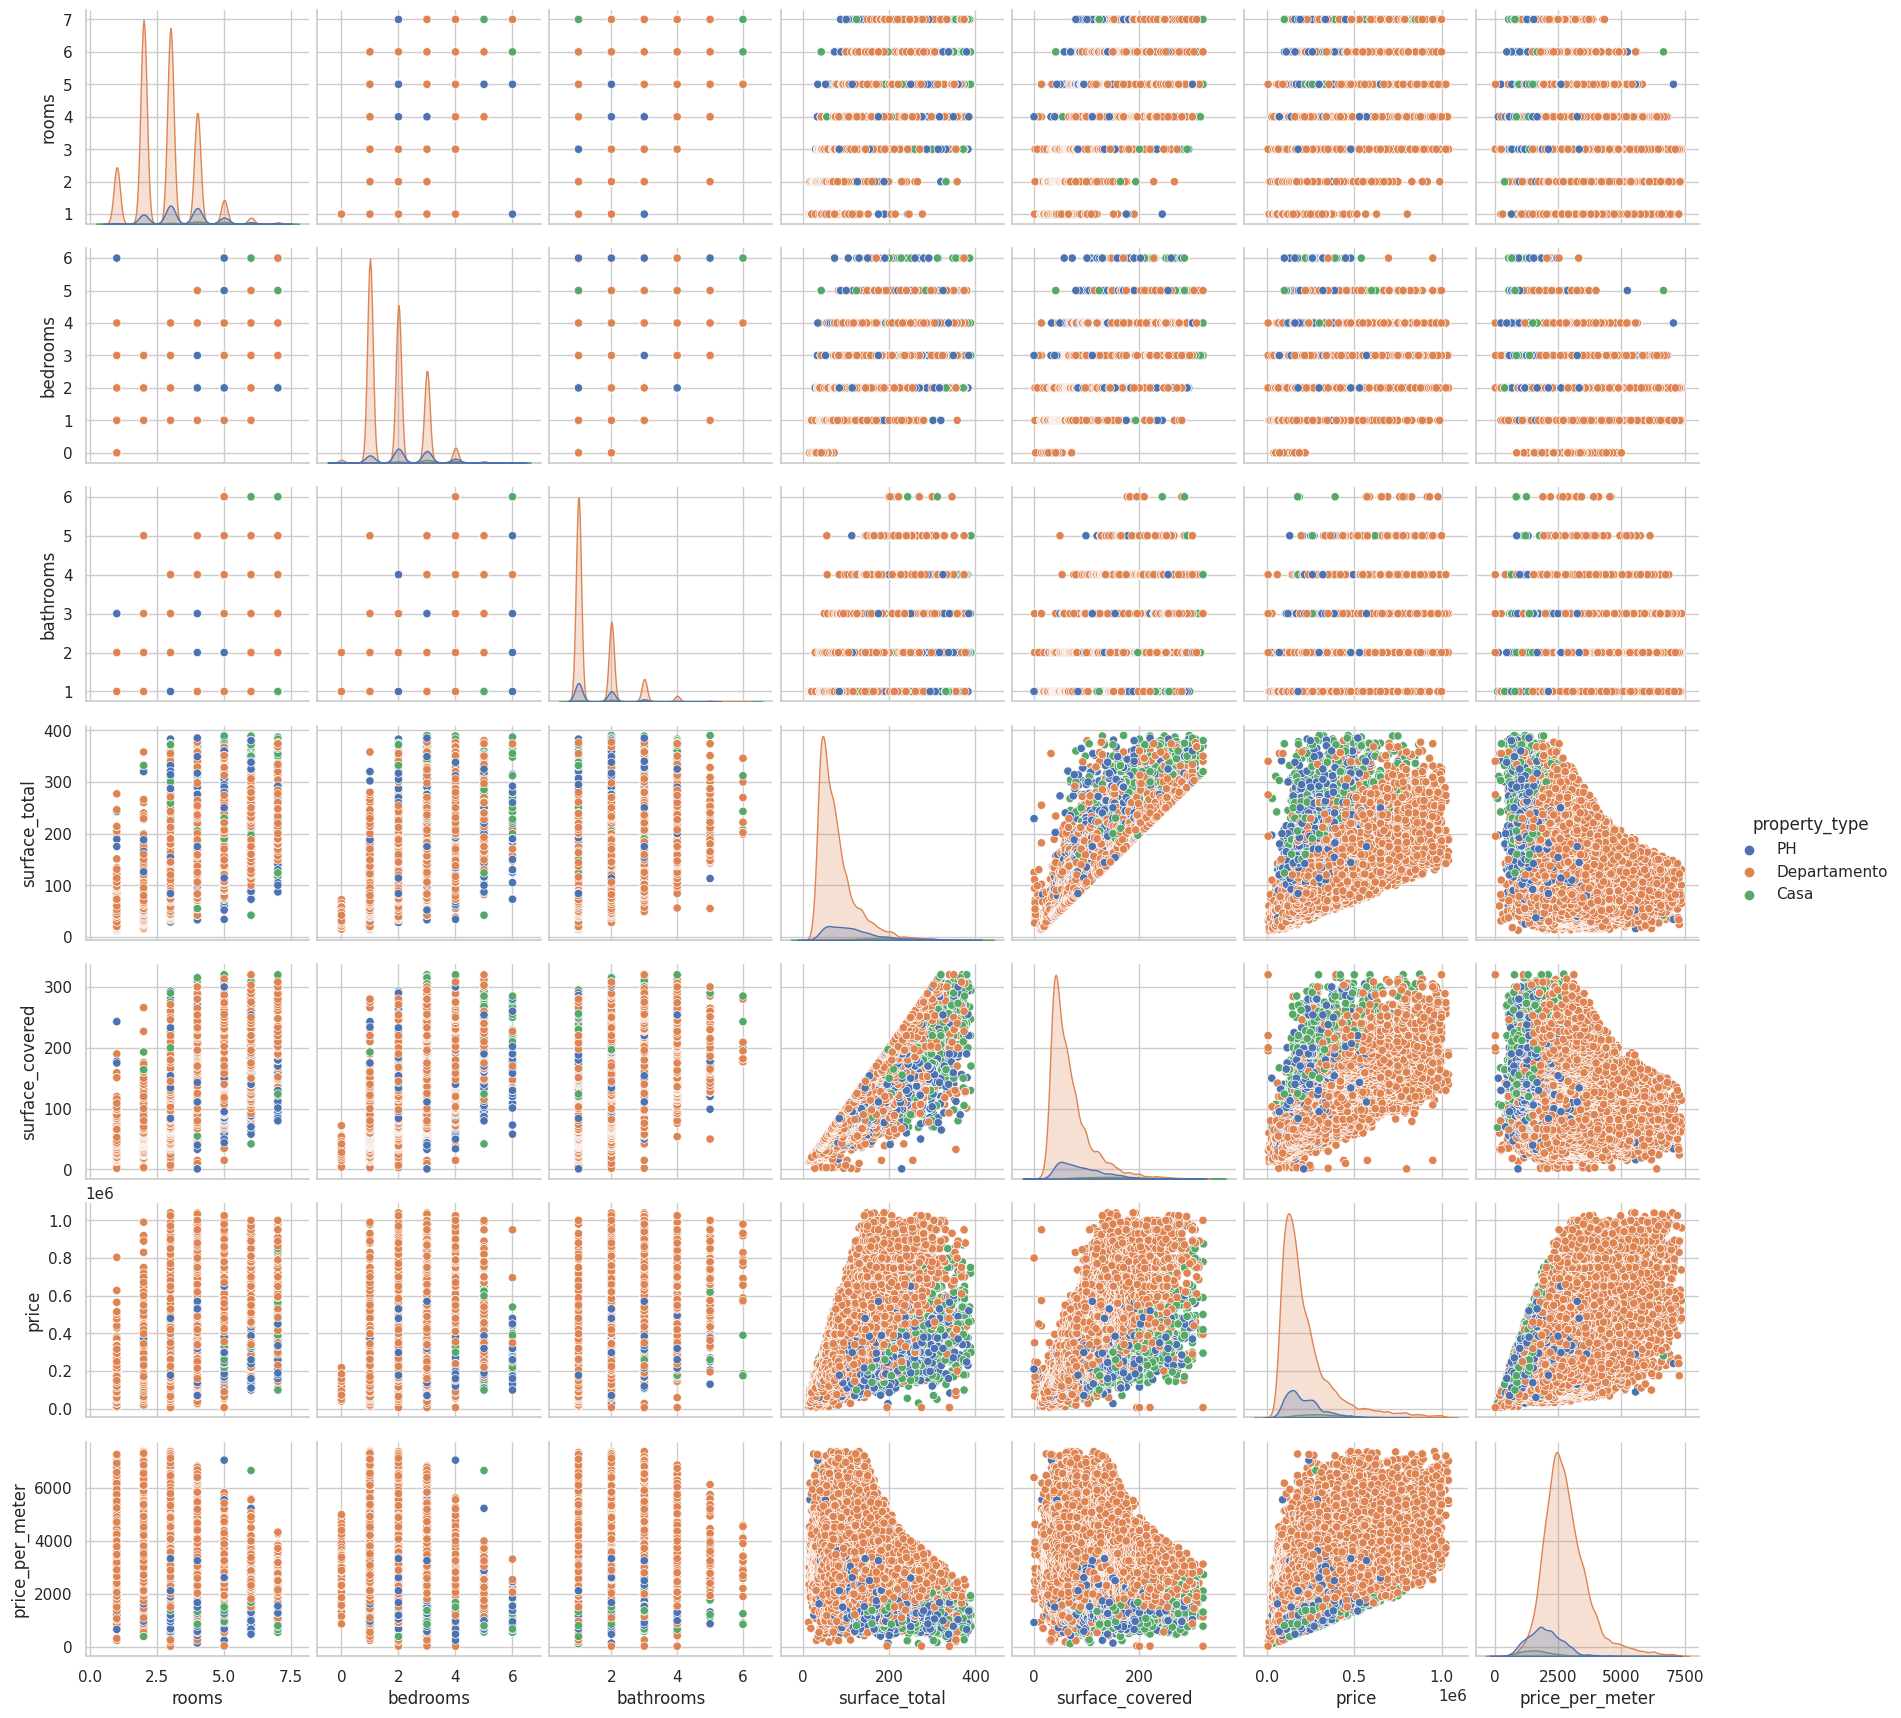

In [41]:
var_Interes = F2.drop(['start_date', 'end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','operation_type'], axis=1)
sns.pairplot(var_Interes, hue = "property_type")

Un poco confuso, entonces intentaremos mejorar la interpretación enfrentando las variables de interés, con ` price`, esto, buscando un comportamiento que correlacione las características del inmueble con su valor en el mercado. Pero se pueden observar relaciones claras entre variables que tienen que ver con el area total, como lo son baños, cuartos y espacios.

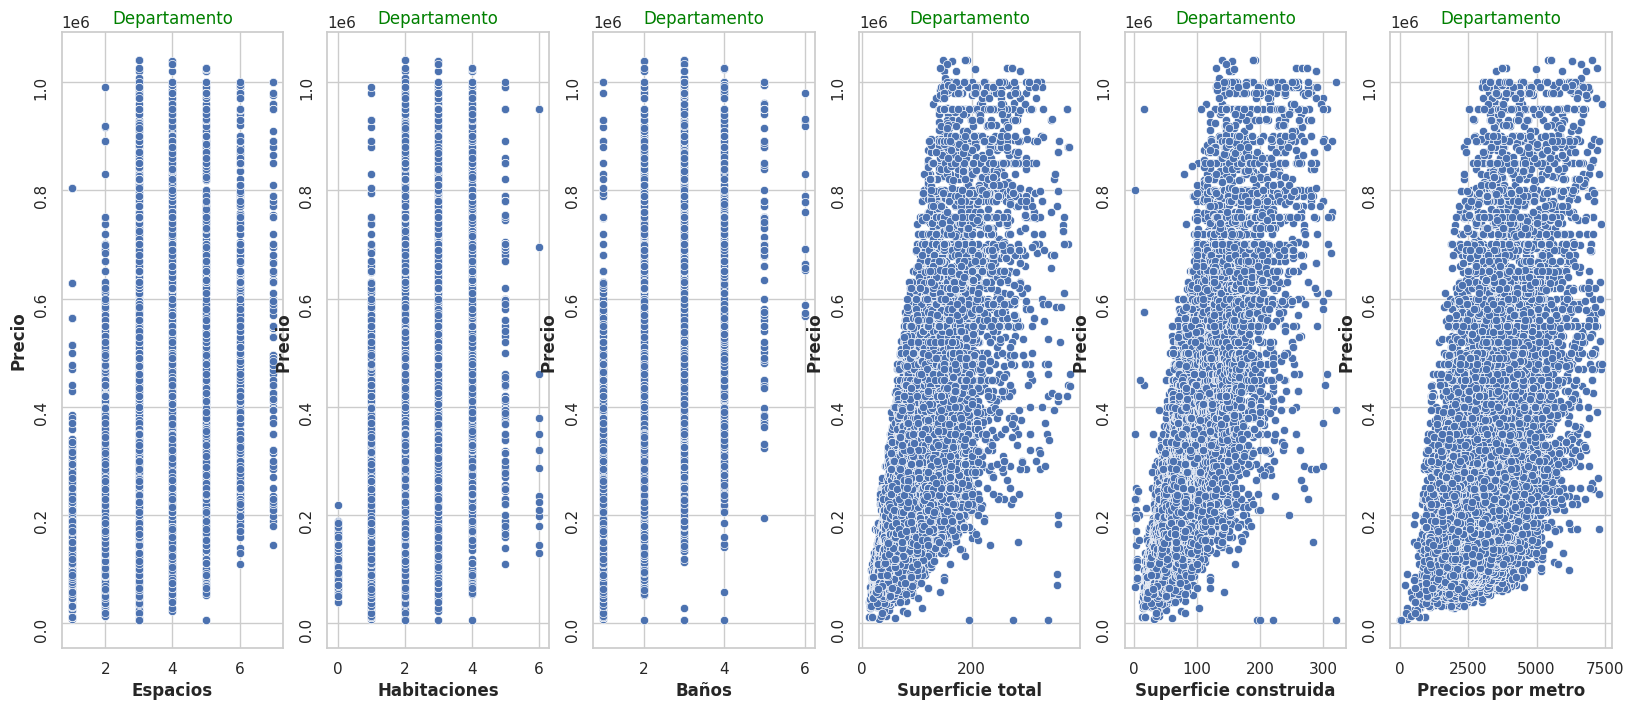

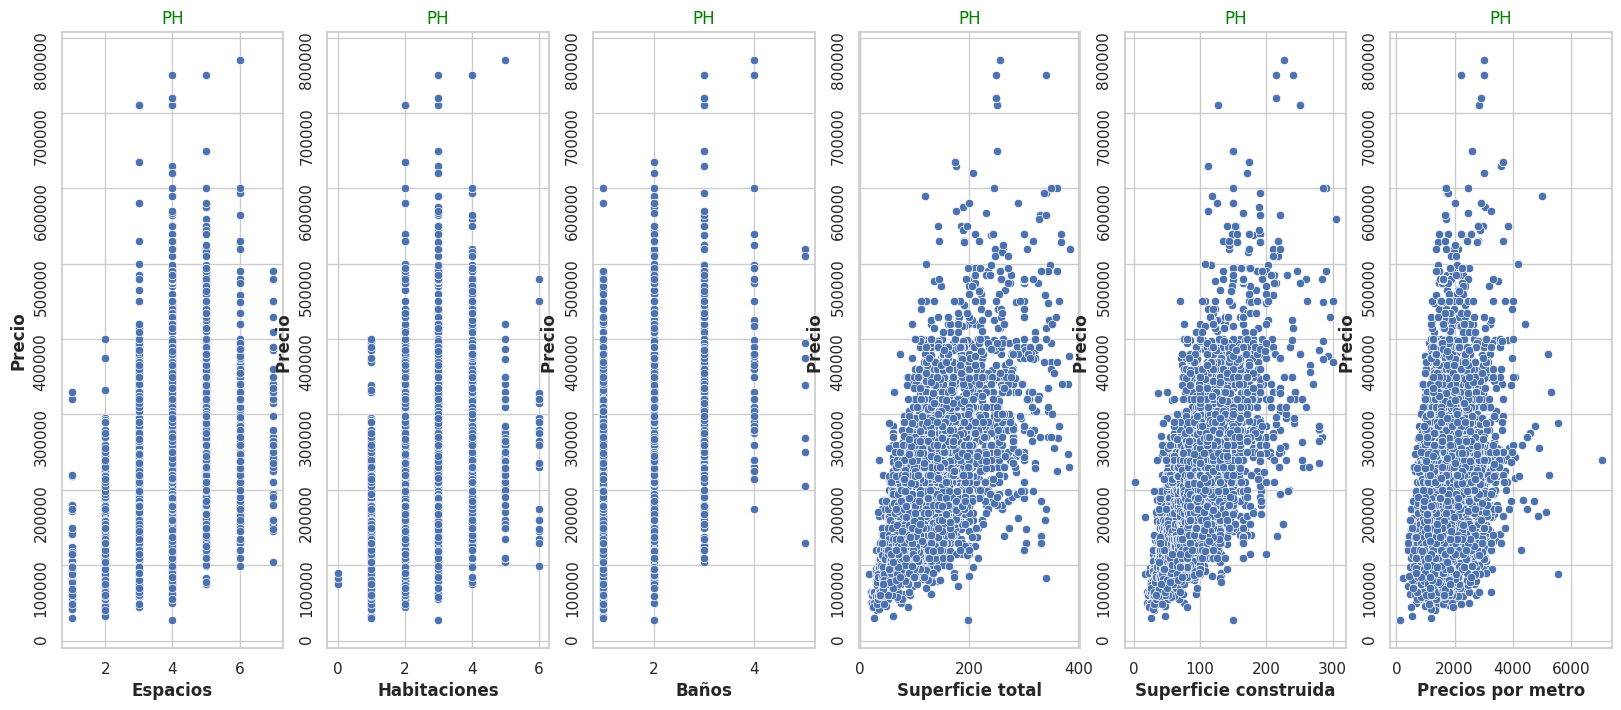

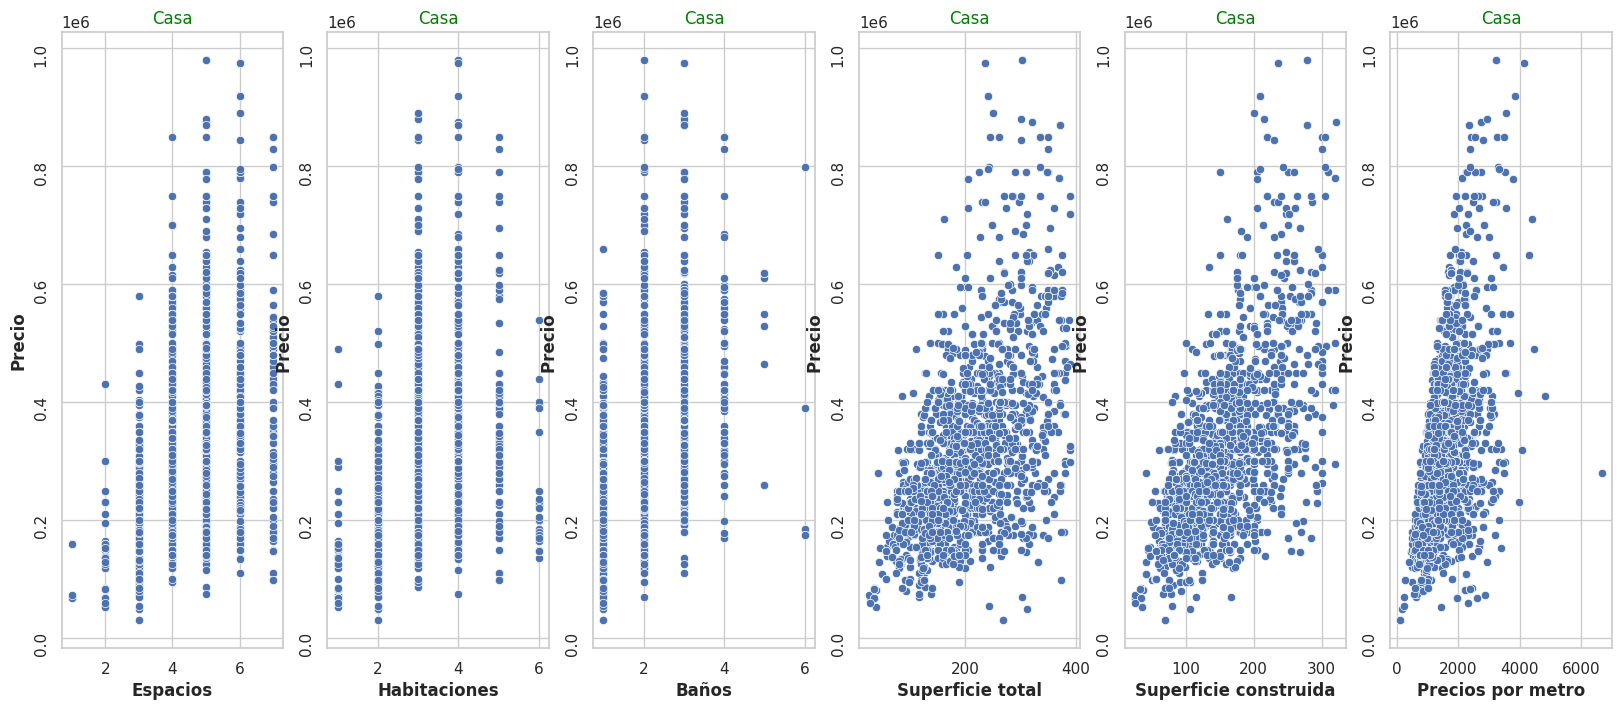

In [42]:
inmuebles= ['Departamento', 'PH', 'Casa']
for i in inmuebles:
    plt.figure(figsize = (20,8))

    plt.subplot(1,6,1)
    plt.xlabel("Espacios", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio", fontweight = "black", fontsize = 12)
    plt.title(i, fontsize=12, color="green");
    sns.scatterplot(data=var_Interes, x= var_Interes[(var_Interes.property_type == i)].rooms, y= var_Interes[(var_Interes.property_type == i)].price)
    plt.yticks(rotation = 90)

    plt.subplot(1,6,2)
    plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio ", fontweight = "black", fontsize = 12)
    plt.title(i, fontsize=12, color="green");
    sns.scatterplot(data=var_Interes, x= var_Interes[(var_Interes.property_type == i)].bedrooms, y= var_Interes[(var_Interes.property_type == i)].price)
    plt.yticks(rotation = 90)

    plt.subplot(1,6,3)
    plt.xlabel("Baños", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio ", fontweight = "black", fontsize = 12)

    plt.title(i, fontsize=12, color="green");
    sns.scatterplot(data=var_Interes, x= var_Interes[(var_Interes.property_type == i)].bathrooms, y= var_Interes[(var_Interes.property_type == i)].price)
    plt.yticks(rotation = 90)

    plt.subplot(1,6,4)
    plt.xlabel("Superficie total", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio ", fontweight = "black", fontsize = 12)
    plt.title(i, fontsize=12, color="green");
    sns.scatterplot(data=var_Interes, x= var_Interes[(var_Interes.property_type == i)].surface_total, y= var_Interes[(var_Interes.property_type == i)].price)
    plt.yticks(rotation = 90)

    plt.subplot(1,6,5)
    plt.xlabel("Superficie construida", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio ", fontweight = "black", fontsize = 12)
    plt.title(i, fontsize=12, color="green");
    sns.scatterplot(data=var_Interes, x= var_Interes[(var_Interes.property_type == i)].surface_covered, y= var_Interes[(var_Interes.property_type == i)].price)
    plt.yticks(rotation = 90)

    plt.subplot(1,6,6)
    plt.xlabel("Precios por metro", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio ", fontweight = "black", fontsize = 12)
    plt.title(i, fontsize=12, color="green");
    sns.scatterplot(data=var_Interes, x= var_Interes[(var_Interes.property_type == i)].price_per_meter, y= var_Interes[(var_Interes.property_type == i)].price)
    plt.yticks(rotation = 90)


- Ahora, al poder una relación directa del resto de variables elegidas, con la variable price, podemos ver correlación entre el comportamiento de esta con los valores de superficie total, superficie construida y precio por metro cuadrado (Esta última es más evidente debido que es una relación directa con esta variable), esto nos da criterios de selección más sólidos.

- La relación entre precio y espacios, habitaciones y baños es un poco incierto, no se puede hallar en si una relación más allá que entre más hay, más alto es su valor.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<ipython-input-43-87abdd1444e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = var_Interes.corr()


Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

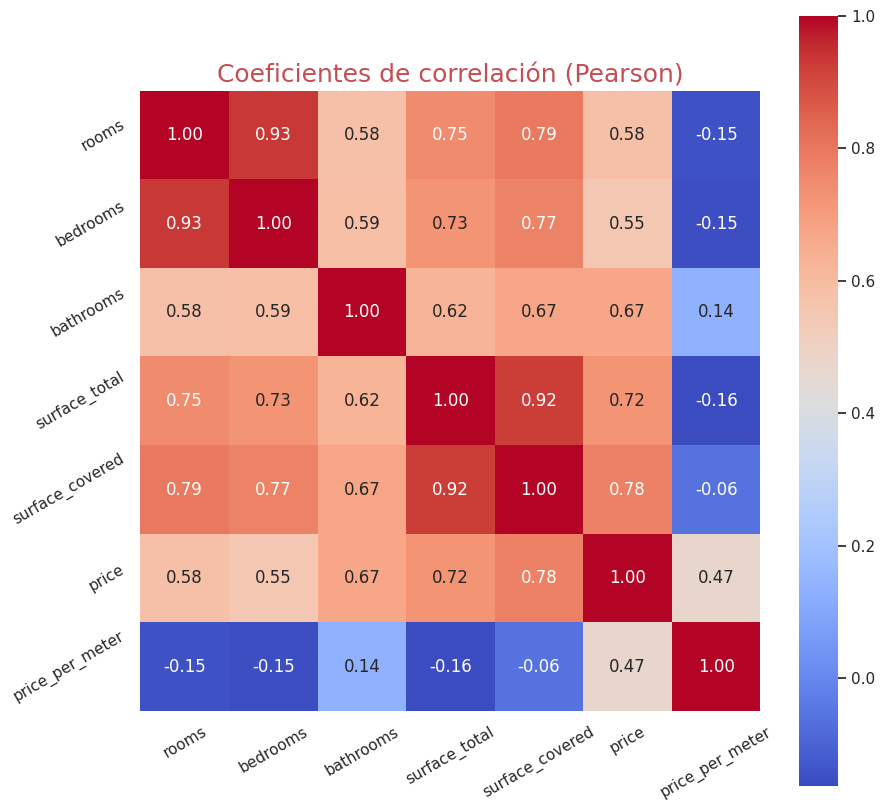

In [43]:
corr = var_Interes.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "r")

- Pasando un poco por alto las variables de localización de este dataset (aunque estas pueden dar condiciones para criterios socio-económicos, se limitó su uso para mejora la interpretación de la información entregada) se presentan fuerte correlación entre los precios y las variables de área total y construida, esto tiene sentido en el contexto inmobiliario, como también la relación que tiene los espacios, habitaciones y baños, pues se relacionan directamente con la cantidad de personas que pueden vivir en el inmueble.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [44]:
!pip install geopandas

In [45]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    F2, geometry=gpd.points_from_xy(F2.lon, F2.lat))


- Como desafío, intenté representar de mejor forma la distribución del dataset en su variable price, usando las librerías especializadas en geopandas.

<Axes: title={'center': 'Distribución de precios'}, xlabel='Longitud', ylabel='Latitud'>

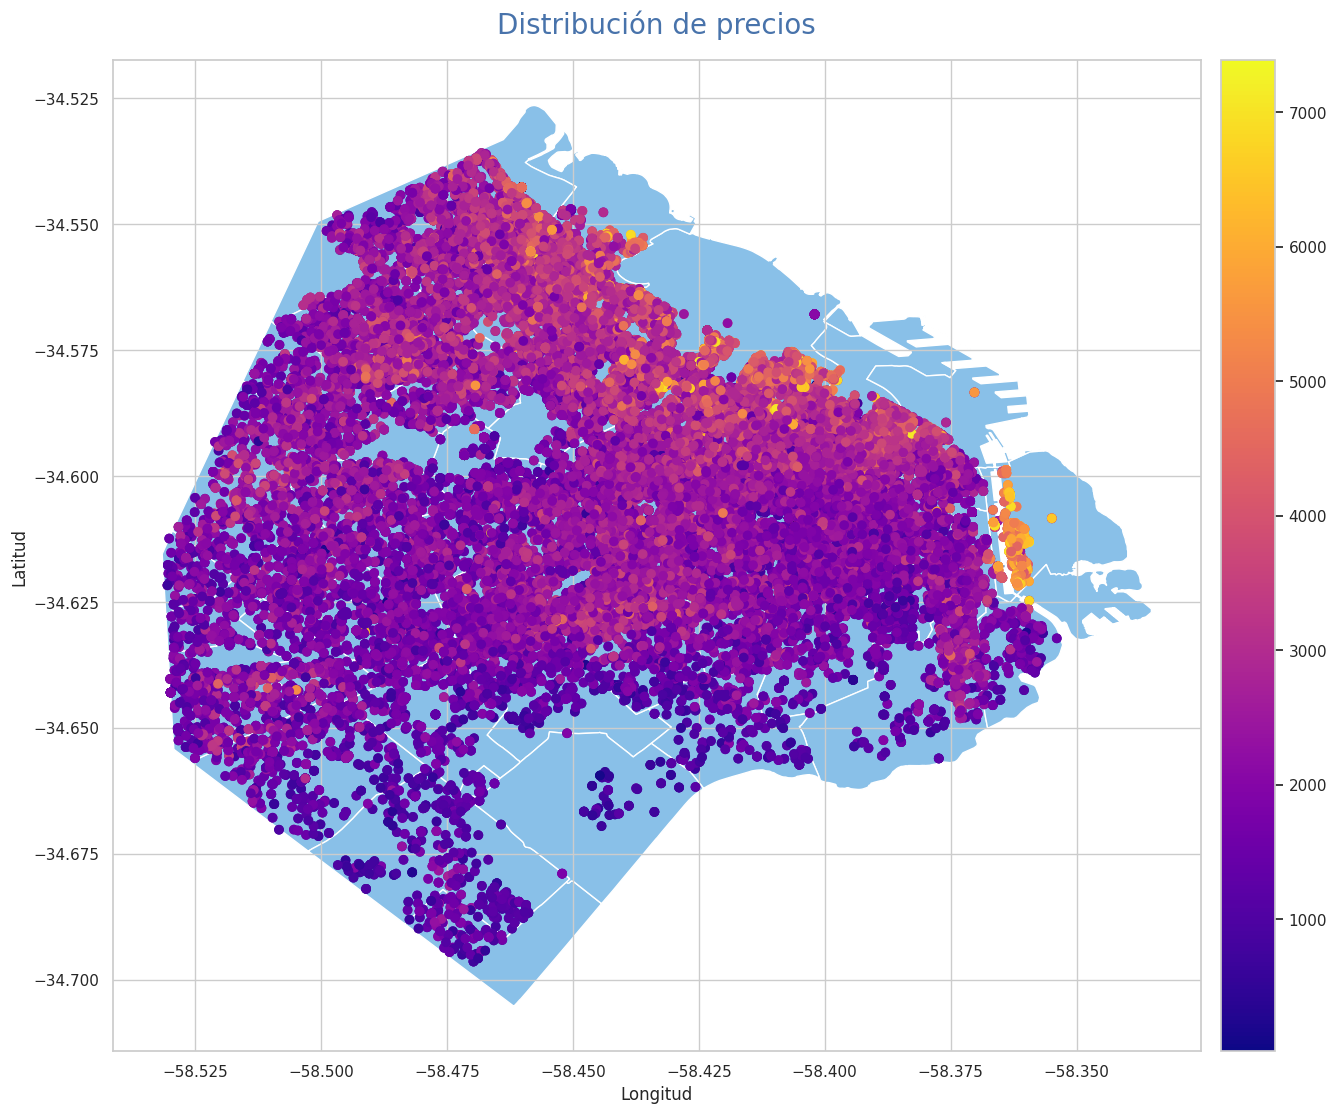

In [46]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Control del encuadre (área geográfica) del mapa
#ax.axis([-12, 5, 32, 48])

# Control del título y los ejes
ax.set_title('Distribución de precios',
             pad = 20,
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
gdf.plot(column='price', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=1)

# Generar y cargar el mapa
gdf.plot(column='price_per_meter', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)

# Cargar un mapa base con contornos de países
barrios = "barrios.csv"
map_barrios = gpd.read_file(barrios)
map_barrios.plot(ax=ax, color='#89c0e8', zorder=0)

# Sección nueva

Con la información disponible, podemos observar tendencias en el precio de vivienda global en el area de Buenos Aires, siendo los puntos más intensos las propiedades de mayor valor disponibles.

<Axes: title={'center': 'Distribución de precio por metro'}, xlabel='Longitud', ylabel='Latitud'>

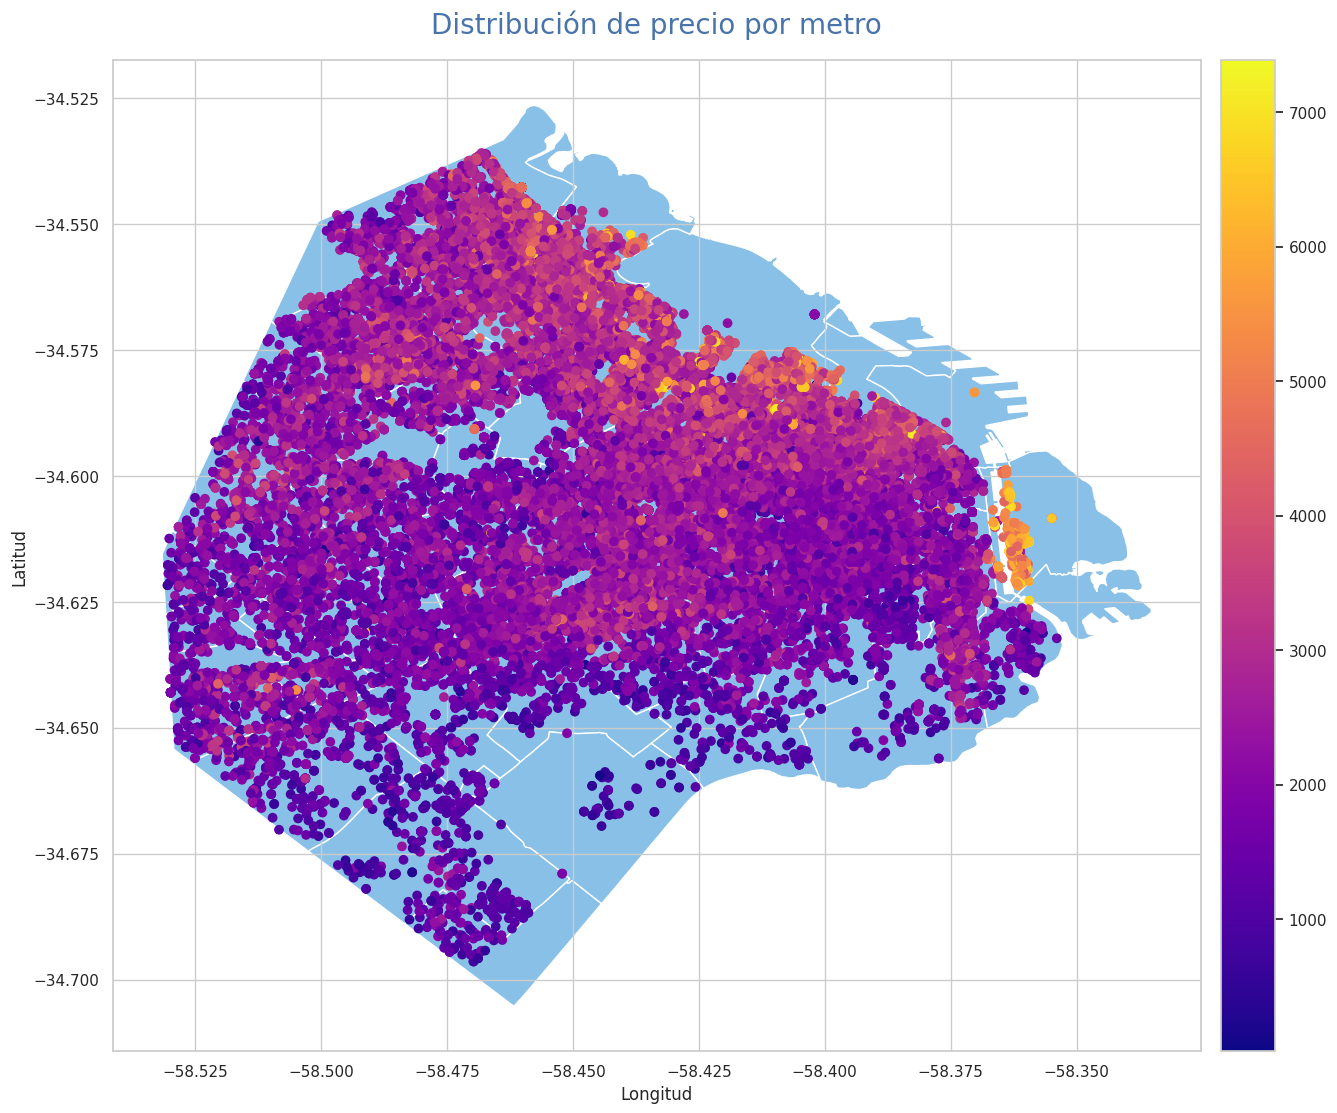

In [47]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Control del encuadre (área geográfica) del mapa
#ax.axis([-12, 5, 32, 48])

# Control del título y los ejes
ax.set_title('Distribución de precio por metro',
             pad = 20,
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
gdf.plot(column='price_per_meter', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)

# Cargar un mapa base con contornos de países
barrios = "barrios.csv"
map_barrios = gpd.read_file(barrios)
map_barrios.plot(ax=ax, color='#89c0e8', zorder=0)

- Ahora, una variable que puede dar tal vez una mejor ilustración de los precios y condición inmobiliaria de la ciudad es price_per_meter, la cual es una variable tanto sensible al precio establecido y el área total del inmueble. El valor por metro cuadrado es una medida que también puede entregar información relevante de las condiciones socioeconómicas de una ciudad/distrito/barrio

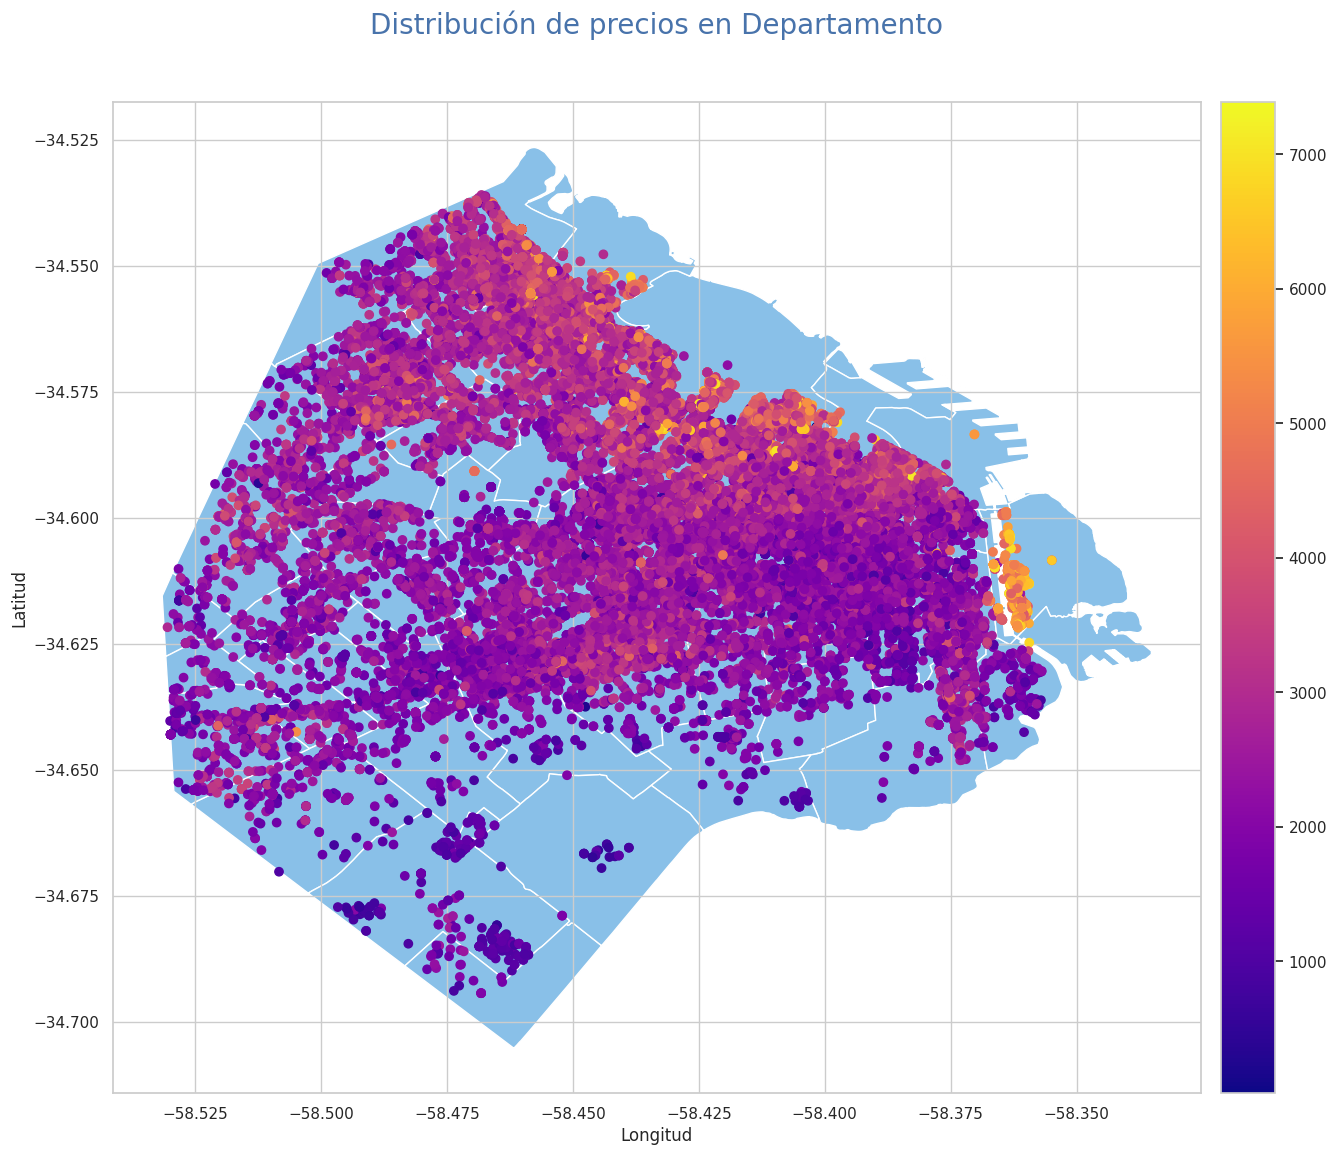

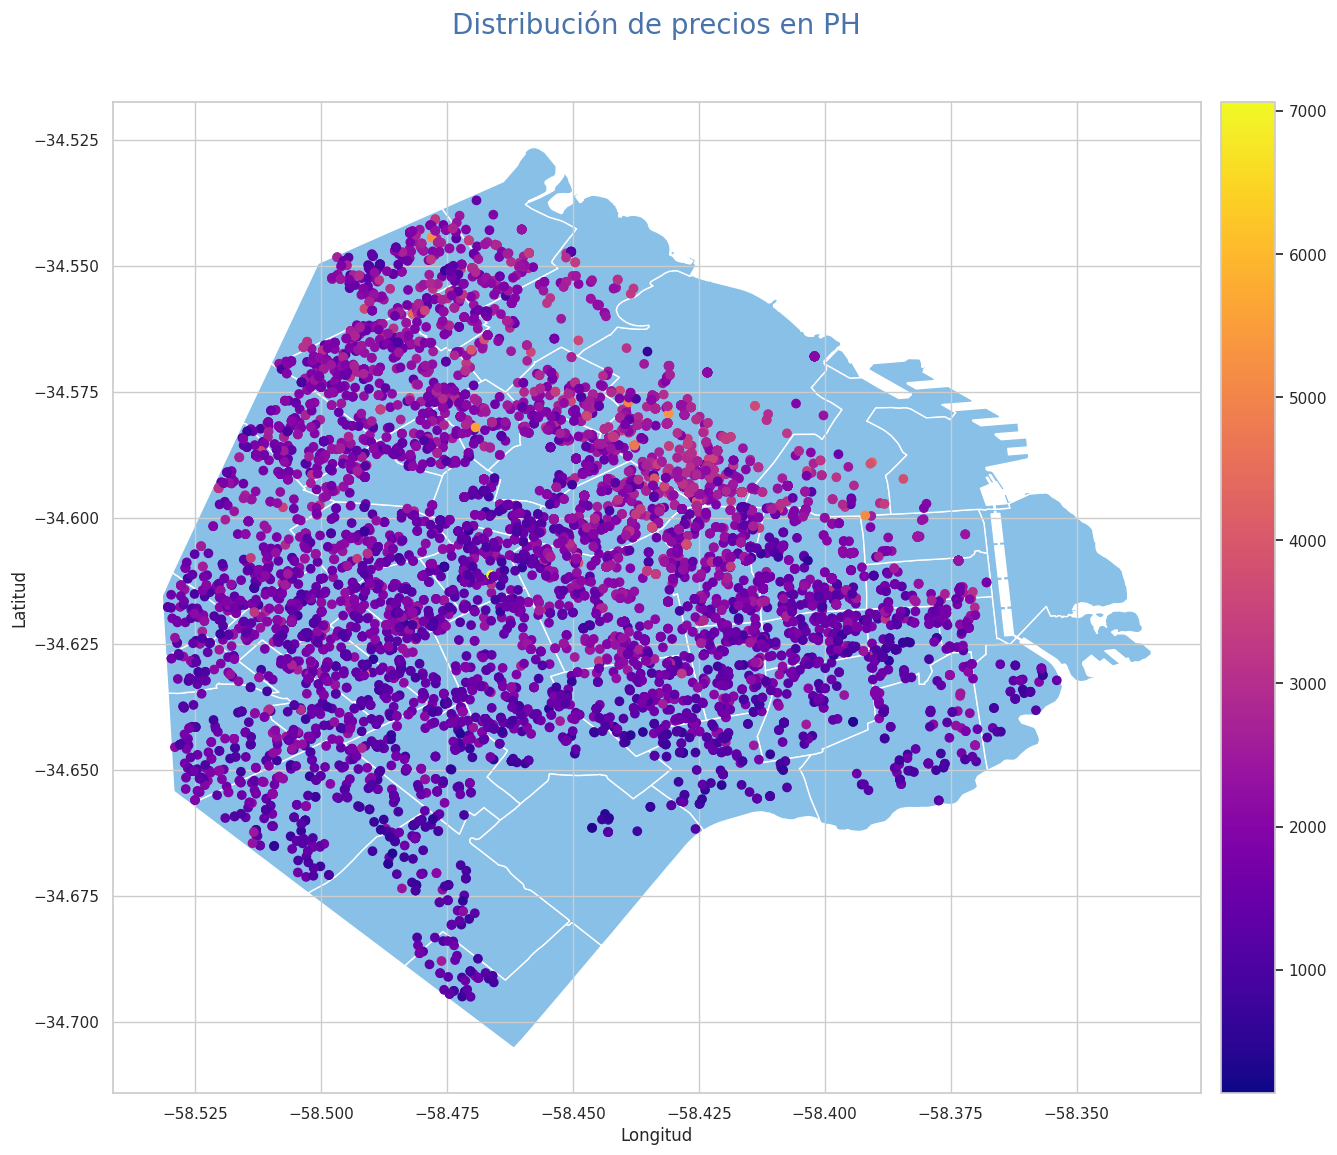

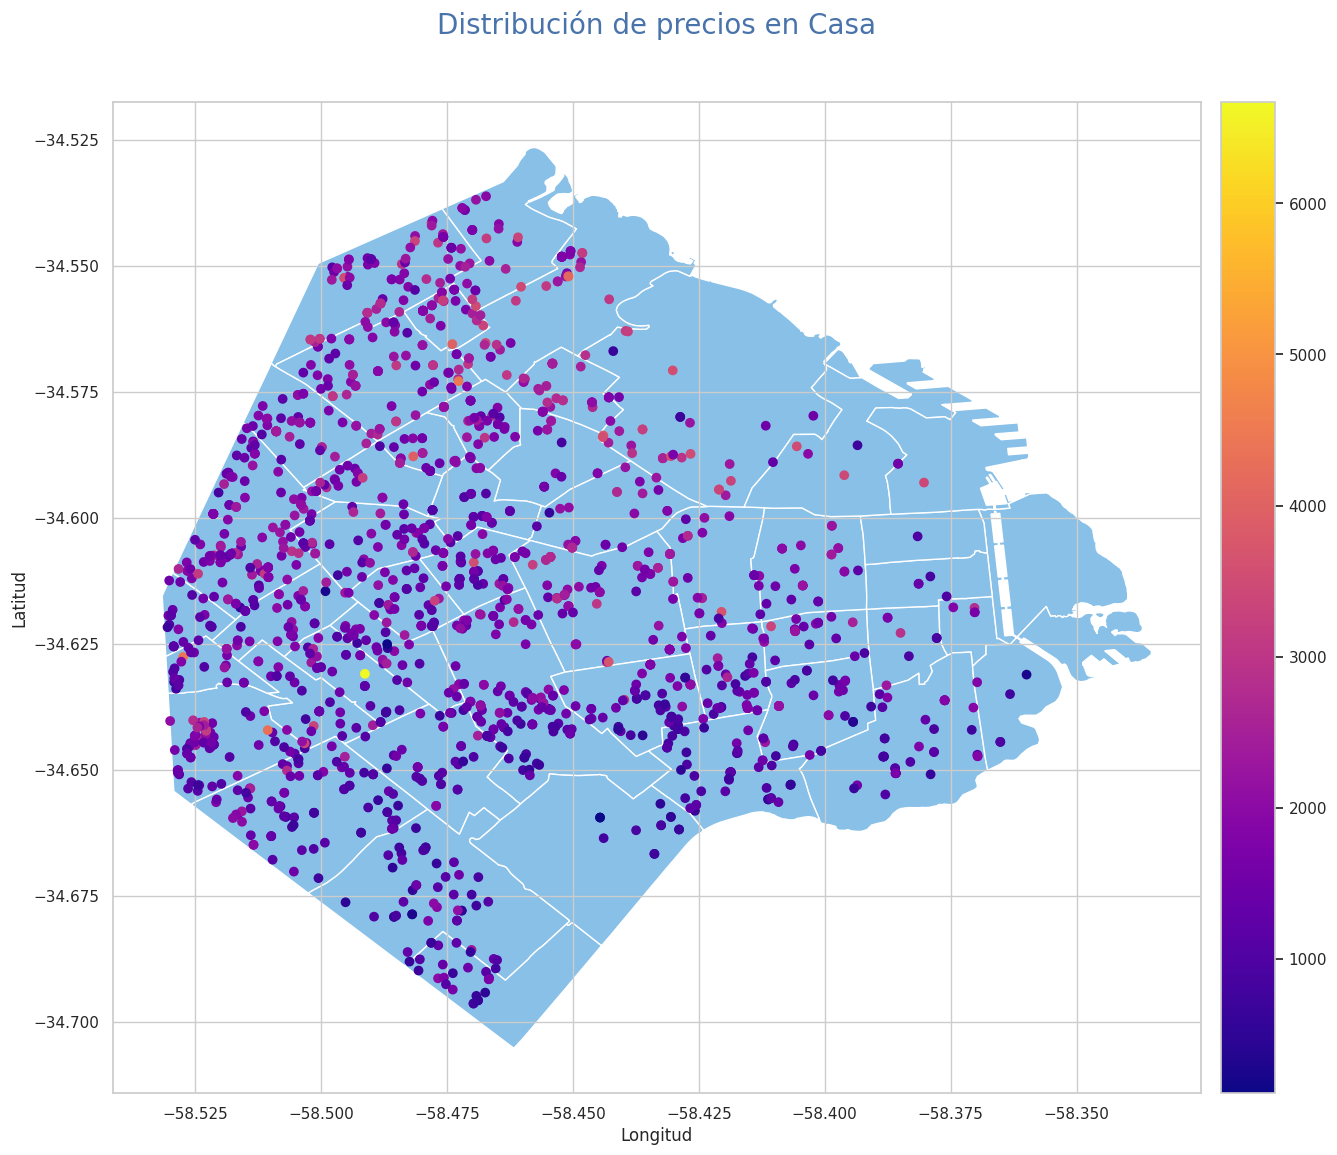

In [48]:
propiedades = ['Departamento','PH','Casa']

for i in propiedades:
    # datos , prop_principales , prop_regionesInteres, F1 , F2
    mask_1 = F2.property_type.isin([i])

    F3 = F2[mask_1]

    #mask_principales = datos.F2.l3.isin(["Departamento", "Casa", "PH"])
    #prop_principales = datos[mask_principales]

    gdf2 = gpd.GeoDataFrame(
    F3, geometry=gpd.points_from_xy(F3.lon, F3.lat))

    #gdf.describe()
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    # Control del encuadre (área geográfica) del mapa
    #ax.axis([-12, 5, 32, 48])

    # Control del título y los ejes
    ax.set_title('Distribución de precios en '+ i ,
                pad = 50,
                fontdict={'fontsize':20, 'color': '#4873ab'})
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Añadir la leyenda separada del mapa
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)

    # Generar y cargar el mapa
    gdf2.plot(column='price_per_meter', cmap='plasma', ax=ax,
                  legend=True, cax=cax, zorder=5)

    # Cargar un mapa base con contornos de países
    barrios = "barrios.csv"
    map_barrios = gpd.read_file(barrios)
    map_barrios.plot(ax=ax, color='#89c0e8', zorder=0)



- Desglozamos ahora por el criterio que tuviemos desde el principio en el dataset, donde las propiedades principales pueden llegar a tener distintos comportamientos, según las dinámicas inmobiliarias de cada área en Buenos Aires, un departamento puede llegar a ser más costoso en cierta zona en donde las casas o PH tienen una menor densidad.

In [49]:
F2.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  73796.000000  73796.000000  77652.000000  77652.000000  77652.000000   
mean     -34.598420    -58.435754      2.899191      1.921741      1.475326   
std        0.023363      0.035297      1.129762      0.933973      0.728795   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.612228    -58.458275      2.000000      1.000000      1.000000   
50%      -34.598843    -58.433516      3.000000      2.000000      1.000000   
75%      -34.584538    -58.411472      4.000000      3.000000      2.000000   
max      -34.535909    -58.353930      7.000000      6.000000      6.000000   

       surface_total  surface_covered         price  price_per_meter  
count   77652.000000     77652.000000  7.765200e+04     77652.000000  
mean       85.322220        74.050482  2.211718e+05      2686.835273  
std        53.879197        43.303755  1.519171e+05       923.219448  
min        13.000000         1.000000  6.000000e+03        17.647059  
25%        49.000000        44.000000  1.220000e+05      2100.000000  
50%        70.000000        61.000000  1.749000e+05      2568.571429  
75%       103.000000        90.000000  2.650000e+05      3125.000000  
max       390.000000       321.000000  1.040000e+06      7384.615385

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

- Métrica elegida : Para evaluar el desempeño de los modelos se utilizó el RMSE (Raíz del error cuadrado promedio), el cual es una de las métricas utilizadas para evaluar modelos de regresión. Las métricas utilizadas para evaluar los modelos de regresión, en su mayoría, miden el error en las predicciones.
- Es una métrica sensible a los errores, así que entre más baja, refleja mejor la corrección de errores externos.

In [50]:
#var_ML= var_Interes.drop(['property_type'],axis=1)
var_ML = prop_regionesInteres.drop(['start_date', 'end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','operation_type'], axis=1)
var_ML = var_ML[(15 <= var_ML.surface_total)&(1000 >= var_ML.surface_total)]
var_ML = var_ML[(4000000 >= var_ML.price)]
var_ML = var_ML.dropna()
var_ML.describe()




rooms      bedrooms     bathrooms  surface_total  \
count  81019.000000  81019.000000  81019.000000   81019.000000   
mean       3.009652      2.002037      1.553821      95.361779   
std        1.308602      1.049673      0.852672      77.253578   
min        1.000000      0.000000      1.000000      15.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000    1000.000000   

       surface_covered         price  price_per_meter  
count     81019.000000  8.101900e+04     81019.000000  
mean         82.179501  2.637725e+05      2762.893939  
std          61.788578  2.989499e+05      1164.677955  
min           1.000000  6.000000e+03        17.647059  
25%          44.000000  1.250000e+05      2096.153846  
50%          63.000000  1.800000e+05      2580.645161  
75%          96.000000  2.800000e+05      3180.000000  
max         891.000000  4.000000e+06     58333.333333

In [51]:
# Ahora para el dataset anterior
var_ML2 = F2.drop(['start_date', 'end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','operation_type'], axis=1)
var_ML2 = var_ML2[(15 <= var_ML2.surface_total)]
var_ML2.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  77642.000000  77642.000000  77642.000000   77642.000000   
mean       2.899436      1.921859      1.475387      85.331483   
std        1.129630      0.933975      0.728822      53.876483   
min        1.000000      0.000000      1.000000      15.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      70.000000   
75%        4.000000      3.000000      2.000000     103.000000   
max        7.000000      6.000000      6.000000     390.000000   

       surface_covered         price  price_per_meter  
count     77642.000000  7.764200e+04     77642.000000  
mean         74.058293  2.211975e+05      2686.975883  
std          43.301072  1.519100e+05       923.158871  
min           1.000000  6.000000e+03        17.647059  
25%          44.000000  1.220000e+05      2100.000000  
50%          61.000000  1.749050e+05      2568.965517  
75%          90.000000  2.650000e+05      3125.000000  
max         321.000000  1.040000e+06      7384.615385

Aquí, se aplican los consejos de filtrado dados, más podría considerar que los aplicados a la fase anterior tenían una cierta cantidad de criterios más exigentes, que aunque reducía en más de 4000 instancias a este dataset, se hará una comparación entre el manejo de ambos dataset

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

**Benchmark**

- Se eligió diseñar un modelo de regresión lineal, se seleccionó las dos variables con mayor correlación entre si, `surface_total `, `surface_covered` y `price_per_meter`y se dejó como variable y (o target) toda la información de `price`, la razón para la elección de estas variables es su alta correlación y posible apoyo para alcanzar un buen rendimiento


In [53]:
#Seleccionamos los hiperparámetros basados en la alta correlación que demostraron
X_ML= var_ML[['surface_total','surface_covered']]
y_ML = var_ML['price']
print(X_ML.shape,y_ML.shape)
X_train, X_test, y_train, y_test = train_test_split(X_ML, y_ML, test_size = 0.3, random_state = 5)
regression = LinearRegression()
regression.fit(X_train, y_train)

(81019, 2) (81019,)


LinearRegression()

In [54]:
#Seleccionamos los hiperparámetros basados en la alta correlación que demostraron para el segundo dataset
X_ML2= var_ML2[['surface_total','surface_covered']]
y_ML2 = var_ML2['price']
print(X_ML2.shape,y_ML2.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ML2, y_ML2, test_size = 0.3, random_state = 5)
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)

(77642, 2) (77642,)


LinearRegression()

In [55]:
#Primer dataset y modelo
y_test_pred = regression.predict(X_test)
y_train_pred = regression.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 199053.07643901143
Raíz del error cuadrático medio en Test: 196415.25530963272


In [56]:
#Segundo dataset y modelo
y_test_pred2 = regression2.predict(X_test2)
y_train_pred2 = regression2.predict(X_train2)

rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test2}')

Raíz del error cuadrático medio en Train: 95744.36441854291
Raíz del error cuadrático medio en Test: 96040.7073955052


<ipython-input-57-5fe99d5458aa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 30, label = 'train');
<ipython-input-57-5fe99d5458aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred, bins = 30, label = 'test');


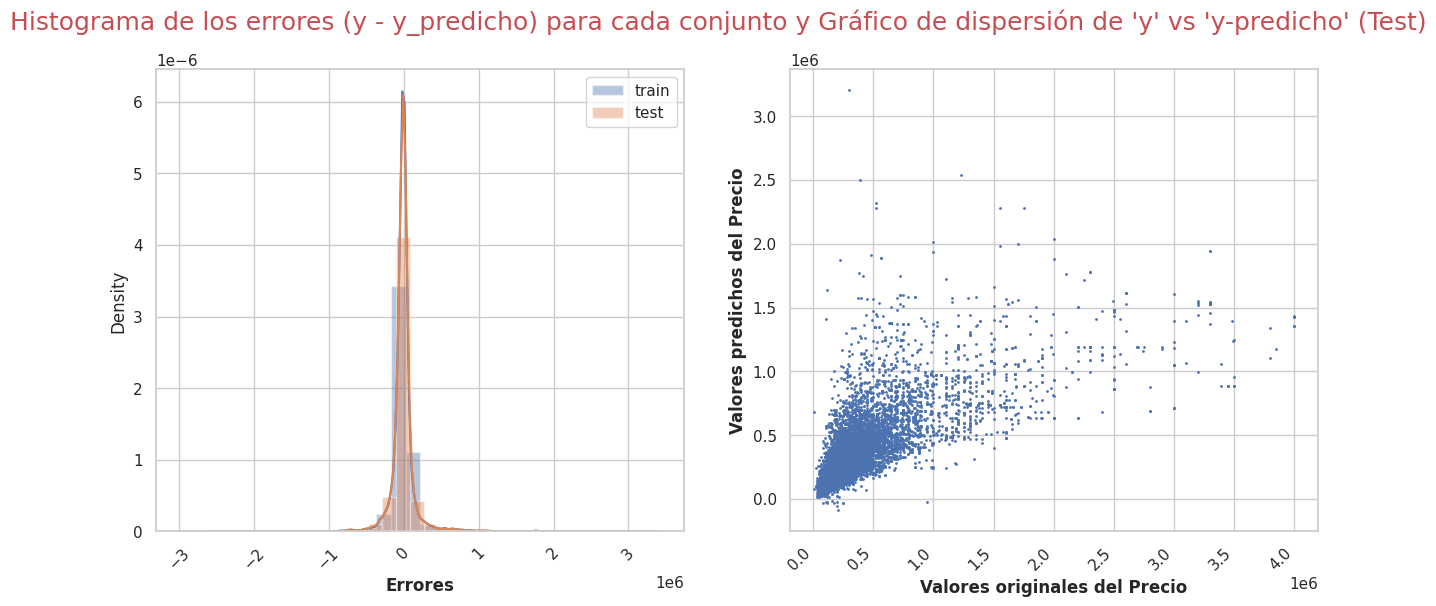

In [57]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

plt.subplot(1,2,1);
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train');
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test');
plt.xlabel("Errores", fontweight = "black", fontsize = 12);
plt.xticks(rotation = 45);
plt.legend();

plt.subplot(1,2,2);
plt.scatter(y_test, y_test_pred, s=1) ;
plt.xticks(rotation = 45, horizontalalignment="right");
plt.xlabel("Valores originales del Precio", fontweight = "black", fontsize = 12);
plt.ylabel("Valores predichos del Precio", fontweight = "black", fontsize = 12);

<ipython-input-58-b5a1cb6268af>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train2 - y_train_pred2, bins = 30, label = 'train')
<ipython-input-58-b5a1cb6268af>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test2 - y_test_pred2, bins = 30, label = 'test')


Text(0, 0.5, 'Valores predichos del Precio')

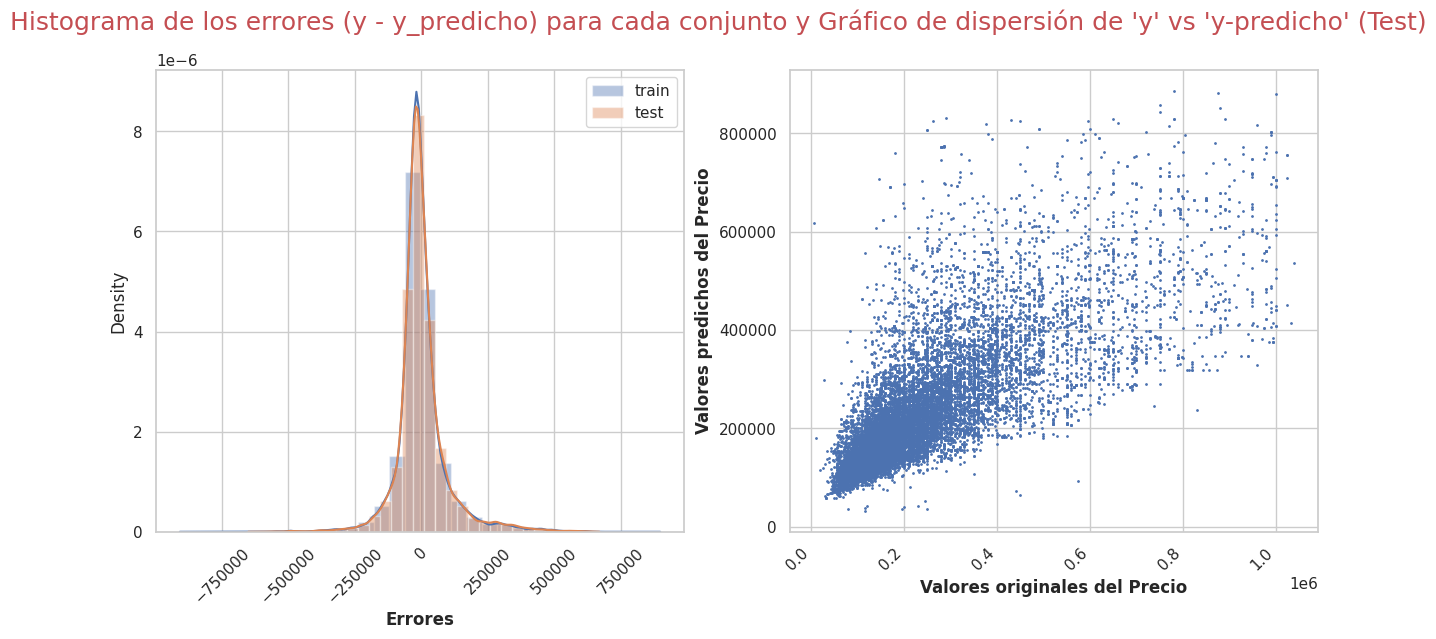

In [58]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

plt.subplot(1,2,1)
sns.distplot(y_train2 - y_train_pred2, bins = 30, label = 'train')
sns.distplot(y_test2 - y_test_pred2, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()
plt.subplot(1,2,2)
plt.scatter(y_test2, y_test_pred2, s=1)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Valores originales del Precio", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio", fontweight = "black", fontsize = 12)

- De ambas gráficas de error y dispersión de los datos podemos tener diferentes conclusiones, pero el elemento más llamativo es la diferencia que pueden llegar a tener ambos modelos con sus valores de RMSE, al presentar una cantidad menor de datos atípicos, o al menos con un criterio distinto, el error disminuye, aunque se debe aclarar que ambos modelos por su propia definición inicial son **bastante distintos**, pero intentando resolver la problemática con diferentes metodologías

- Así que toda comparación se debe centrar netamente en los modelos entrenamos con el mismo dataset.

Ahora, se hace una función para aplicar modelos a distinta cantidad de datos

In [59]:
def Aplicar_modelo(X_train, X_test, y_train, y_test, modelo):

    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1)
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")

1. Árbol de decisiones: Empezamos la metodología de aplicación a cada uno de los modelos, empezando con el arbol de decisiones, para ambos datasets

In [60]:
X = var_ML[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y = var_ML["price"]
XX = var_ML2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
yy = var_ML2["price"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX  , yy, test_size = 0.3, random_state = 5)

In [62]:
tree_model = DecisionTreeRegressor(max_depth = 5, random_state=5)
tree_model2 = DecisionTreeRegressor(max_depth = 5, random_state=5)

Raíz del error cuadrático medio en Train: 166030.9665743521
Raíz del error cuadrático medio en Test: 166443.9818226486


<ipython-input-59-62db9b8336a6>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
<ipython-input-59-62db9b8336a6>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')


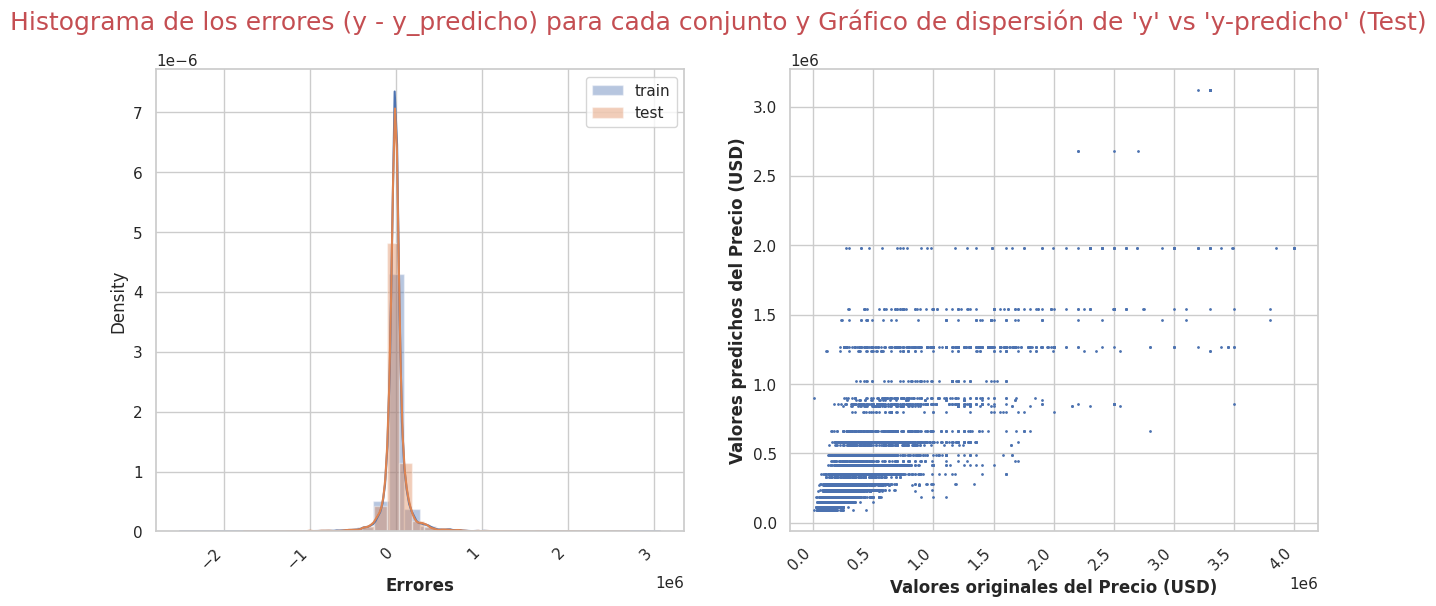

In [63]:
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model)

Raíz del error cuadrático medio en Train: 87034.10726415661
Raíz del error cuadrático medio en Test: 88207.57291866631


<ipython-input-59-62db9b8336a6>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
<ipython-input-59-62db9b8336a6>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')


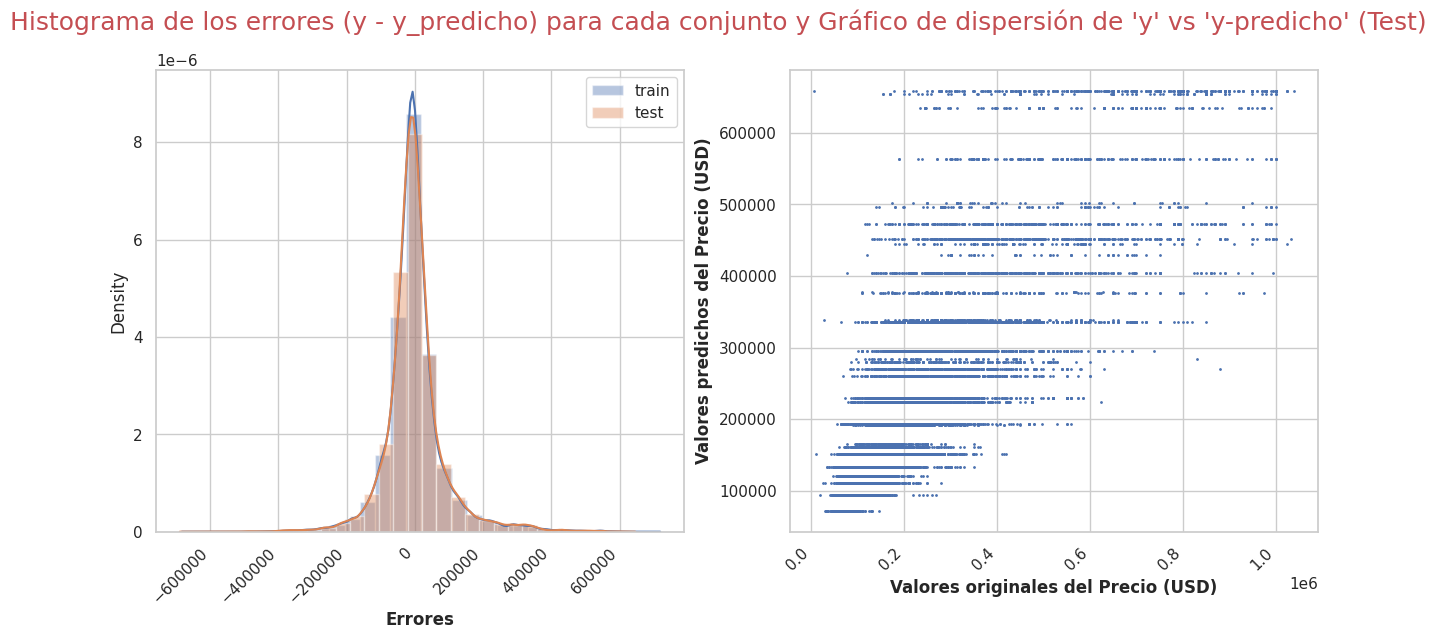

In [64]:
Aplicar_modelo(XX_train, XX_test, yy_train, yy_test, tree_model2)

In [66]:
plt.figure(figsize = (15,6))
importances = tree_model.feature_importances_
columns = X_train.columns
sns.barplot(columns, importances)
plt.title('Relevant features 1 ')
plt.show()

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

In [67]:
plt.figure(figsize = (15,6))
importances = tree_model2.feature_importances_
columns = XX_train.columns
sns.barplot(columns, importances)
plt.title('Relevant features 2')
plt.show()

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

- Ahora, se visualiza cuales son las variables que tomó con más consideración ambos modelos, notando que para ambos, las de rooms, bedrooms y bathrooms fueron totalmente descartadas, esto se podría entender ya que son variables relacionadas después de todo en la incidencia del precio del inmueble y también su numero se relaciona con el área total disponible.

- Esta ruta de aprendizaje presentó un buen rendimiento para ambos modelos, y para ambos casos, logrando disminuir el valor del RMSE respecto al modelo de regresión inicial.



Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

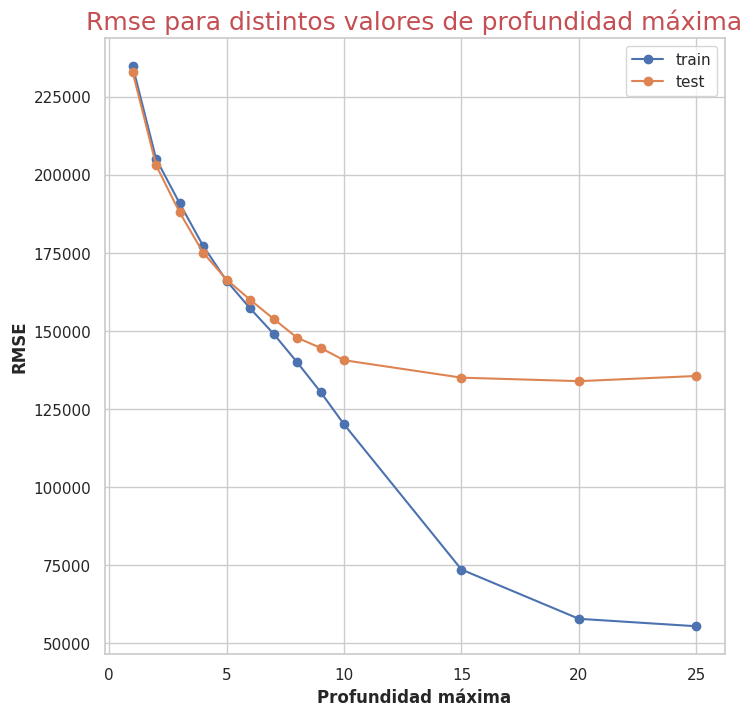

In [68]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i, random_state=5)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (8,8))
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

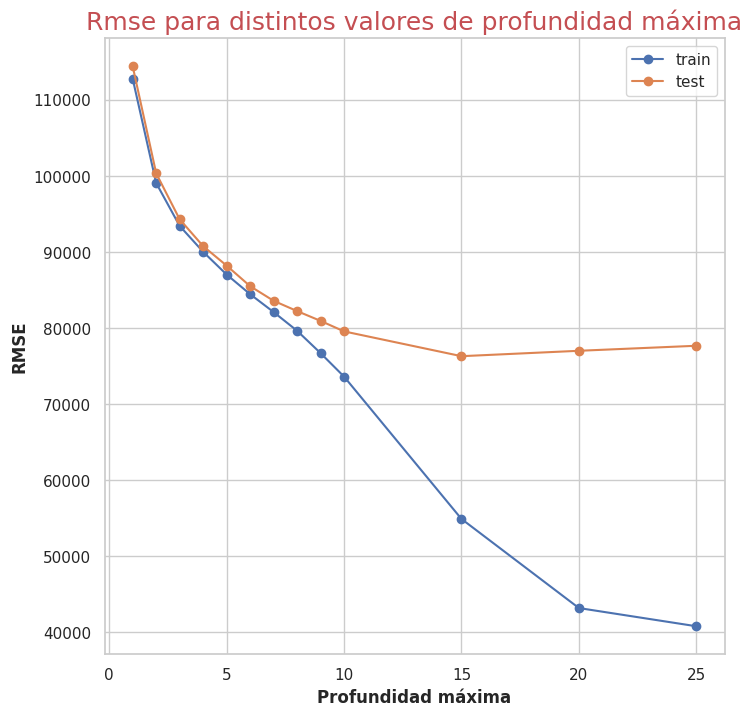

In [69]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i, random_state=5)
    model.fit(XX_train, yy_train)
    yy_train_pred = model.predict(XX_train)
    train_rmse = np.sqrt(mean_squared_error(yy_train, yy_train_pred))
    yy_test_pred = model.predict(XX_test)
    test_rmse = np.sqrt(mean_squared_error(yy_test, yy_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (8,8))
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

- Evaluamos en ambos modelos a distintas profundidades para poder hallar un valor adecuado, y basandonos en el comportamiento de ambos, cerca de la profundidad 10 se obtienen para ambos modelos los mejores comportamientos

In [70]:
tree_model = DecisionTreeRegressor(max_depth = 10,random_state=5)

In [71]:
tree_model2 = DecisionTreeRegressor(max_depth = 10,random_state=5)

Raíz del error cuadrático medio en Train: 120096.37378453308
Raíz del error cuadrático medio en Test: 140633.5660173712


<ipython-input-59-62db9b8336a6>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
<ipython-input-59-62db9b8336a6>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')


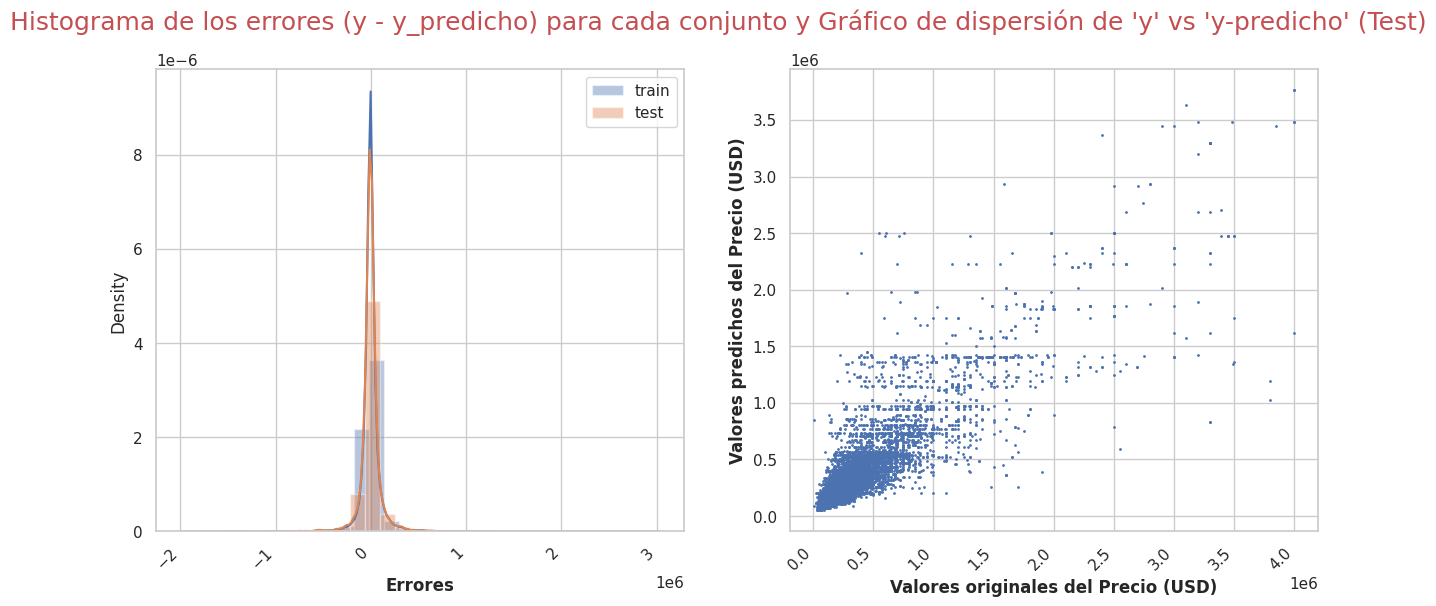

In [72]:
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model)

Raíz del error cuadrático medio en Train: 73616.53855380164
Raíz del error cuadrático medio en Test: 79561.26144620443


<ipython-input-59-62db9b8336a6>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
<ipython-input-59-62db9b8336a6>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')


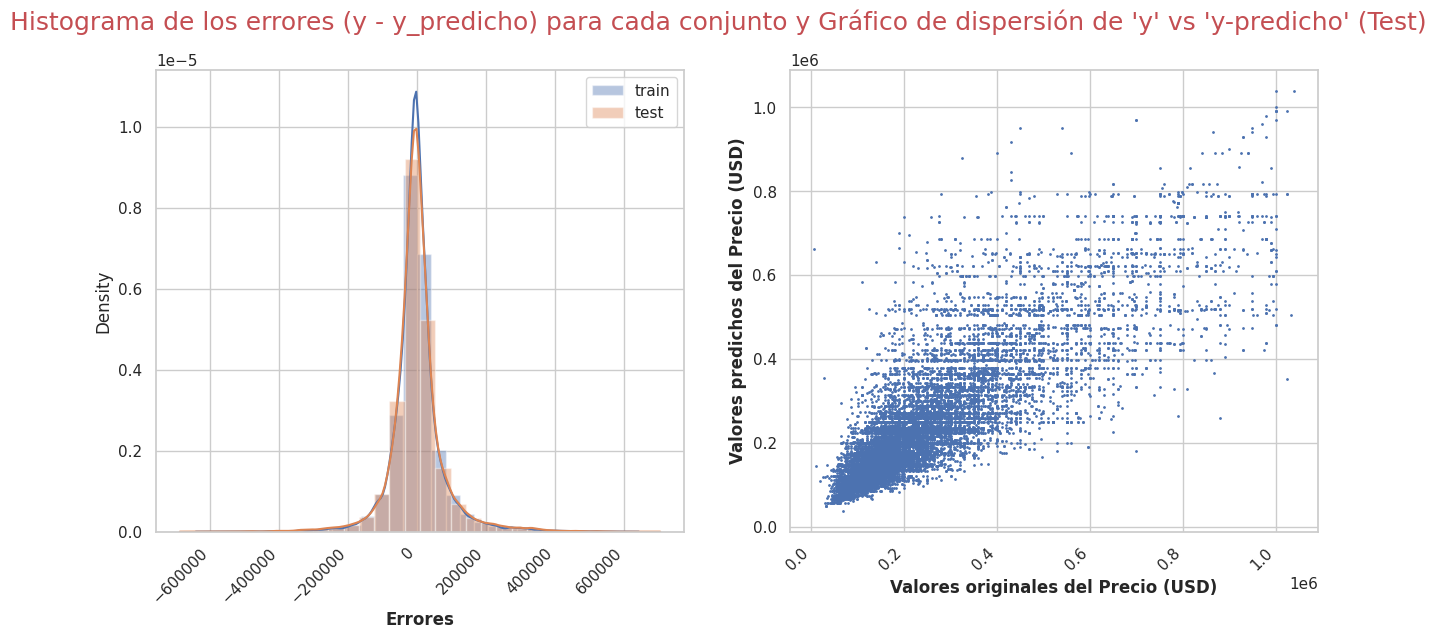

In [73]:
Aplicar_modelo(XX_train, XX_test, yy_train, yy_test, tree_model2)

In [74]:
plt.figure(figsize = (15,6))
importances = tree_model.feature_importances_
columns = X_train.columns
sns.barplot(columns, importances)
plt.title('Relevant features ')
plt.show()

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

In [75]:
plt.figure(figsize = (15,6))
importances = tree_model2.feature_importances_
columns = XX_train.columns
sns.barplot(columns, importances)
plt.title('Relevant features 2')
plt.show()

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

- Tenemos conclusiones curiosas de ambos modelos, ambos llegan a tener un muy buen comportamiento al reducir su RMSE, respecto a la primera aplicación del modelo, como en su modelo de regresión inicial.

- Aunque ambos tienen una cierta similitud ya que gran parte en sus datos son similares, ambos tienen criterios de filtrado, lo que hace compleja la comparación entre ambos modelos, pero algo que si se puede decir es que sus rendimientos responden similar a los criterios de selección de variables de entrenamiento, como se puede observar en las últimas dos gráficas.

**KNeighbors**

Ahora seguiremos una metodología similar, pero con el modelo de vecinos más cercanos.

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors = 5 )

In [ ]:
KNN_model2 = KNeighborsRegressor(n_neighbors = 5)

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model)

In [ ]:
Aplicar_modelo(XX_train, XX_test, yy_train, yy_test, KNN_model2)

- Al aplicar el modelo en ambos datasets, llama la atención el comportamiento tan similar a ambos modelos ya entrenados en el punto anterior, sin estos haber sido optimizados aún, pero esto se puede deber a que este modelo suele tener un comportamiento bastante bueno para los modelos en regresión.

- Pero, un dato que puede ser muy conflictivo también, es que este modelo, en ambos datasets puede tender fuertemente al overfitting, por esta razón hay que tener precauciones en el momento de elegir un número adecuado de vecinos.

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (8,8))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(XX_train, yy_train)
    yy_train_pred = model.predict(XX_train)
    train_rmse = np.sqrt(mean_squared_error(yy_train, yy_train_pred))
    yy_test_pred = model.predict(XX_test)
    test_rmse = np.sqrt(mean_squared_error(yy_test, yy_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (8,8))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

- Como pasó anteriormente, ambos modelos funcionaron de distintas maneras según el dataset, al llegar cada uno a conclusiones y decisiones distintas según la información, pero como suele ocurrir con este tipo de modelos, el overfitting puede llegar a ser excesivamente alto, al final se considera que el número es lo suficientemente adecuado, aunque se podría pensarse en dejar solo uno, pero es una situación poco deseada.

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
KNN_model_2 = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model);

In [ ]:
Aplicar_modelo(XX_train, XX_test, yy_train, yy_test, KNN_model_2)

- Ahora, este método es dificil de manejar debido a su alta tendencia al overfitting, incluso aunque mostrando un comportamiento mejor que el arbol, el overfit se puede evidenciar entre menos vecinos se le permiten. Se intentará ahora con el parámetros weight = distance

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k, weights = "distance")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k, weights = "distance")
    model.fit(XX_train, yy_train)
    yy_train_pred = model.predict(XX_train)
    train_rmse = np.sqrt(mean_squared_error(yy_train, yy_train_pred))
    yy_test_pred = model.predict(XX_test)
    test_rmse = np.sqrt(mean_squared_error(yy_test, yy_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (8,8))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Ahora, con este nuevo método, se obtienen incluso mejores valores en el primer modelo y en el segundo igual, pero en este el nivel del overfit a los datos en entrenamiento es demasiado alto.

**Conclusiones**

- Desde un principio, la necesidad de un preprocesamiento adecuado llevó a la elección de distintos criterios, tomando en cuenta uno seguido para la primera parte, y otro sugerido para la segunda. Se hicieron pruebas y modelos para cada uno de estos.

- Los árboles de decisiones y los KNeighbors, en ambos datasets dieron buenos resultados, que fueron mejorando con la aplicaciones de mejores criterios de elección de hiperparámetros, pero al compararlos, los modelos de KNeighbors presentaban una alta tendencia al overfit de sus datos, siendo entonces los árboles mejores elecciones.

- Ahora, para centrarnos en la diferencia de los datasets, se puede apreciar globalmente que tienen diferencias considerables, tanto en su cantidad de datos, como también en las variables que se tuvieron en cuenta, siendo price_per_meter la principal diferencia en este aspecto, y al final la que determinó un cambio en el peso de los modelos que la tenían.

- Así, un modelo de árbol de decisiones, con una profundidad de 10 fue la mejor elección, para ambos datasets, pero, entre los dos, el rendimiento que se vio, le da un mejor comportamiento al segundo modelo.

- Ahora, para el primer modelo y en si todos en los que se usó el primer dataset, el nivel de error arrojado, aunque fue mejorando paso a paso a lo largo de la selección de mejores hiperparámetros o mejora en los modelos como lo fue con el argumento weight= distance, siguió siendo alto, esto se puede tomar como un indicio de que las variables que se tomaron en cuenta, puede que no estén aportando la suficiente información para que el modelo tenga la capacidad de predecir de una manera las eficiente.

- Para mejorar los resultados de los modelos entrenados con el primer dataset, probaría en agregar la variable 'price_per_meter', esta elección fue tomada para el segundo dataset, y aunque tiene distintos criterios de filtrado y particiones hechas, los modelos entrenados con esta variable extra, tendieron a darle más peso a esta variable y quitarle el que le daban a baños, habitaciones y espacios.